# Соберём все результаты

In [24]:
import numpy as np
import os
from IPython.display import Image
from scipy import stats
%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [25]:
import functions

In [26]:
Distance = 9.3 # Mpc
incl = 62.
cosi = np.cos(incl / 180. * np.pi)
sini = np.sin(incl / 180. * np.pi)

In [27]:
sigma_s = np.load('./data/sigma_s.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')
sigma_HI = np.load('./data/sigma_HI.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
Sigma_s = np.load('./data/Sigma_s.npy')
sig_R_max = np.load('./data/sig_R_max.npy')
sig_R_min = np.load('./data/sig_R_min.npy')
r_HI = np.load('./data/r_HI.npy')
vel_HI = np.load('./data/vel_HI.npy')
velocity_HI = np.load('./data/velocity_HI.npy')
kappa = np.load('./data/kappa.npy')
dist_kpc = np.load('./data/dist_kpc_corr.npy')
sig_R_min_err = np.load('./data/sig_R_min_err.npy')
sig_R_max_err = np.load('./data/sig_R_max_err.npy')
sigma_s_err = np.load('./data/sigma_s_err.npy')
H_alpha = np.load('./data/H_alpha.npy')
Z = np.load('./data/Z.npy')

### Возникла небольшая проблема


В процессе проверки кода я обнаружила, что в качестве PA=178 у меня 180-178 = 12, а не 2. Я исправила эту ошибку, но не до конца. При исправлении у меня что-то странное произошло с эпициклической частотой. 

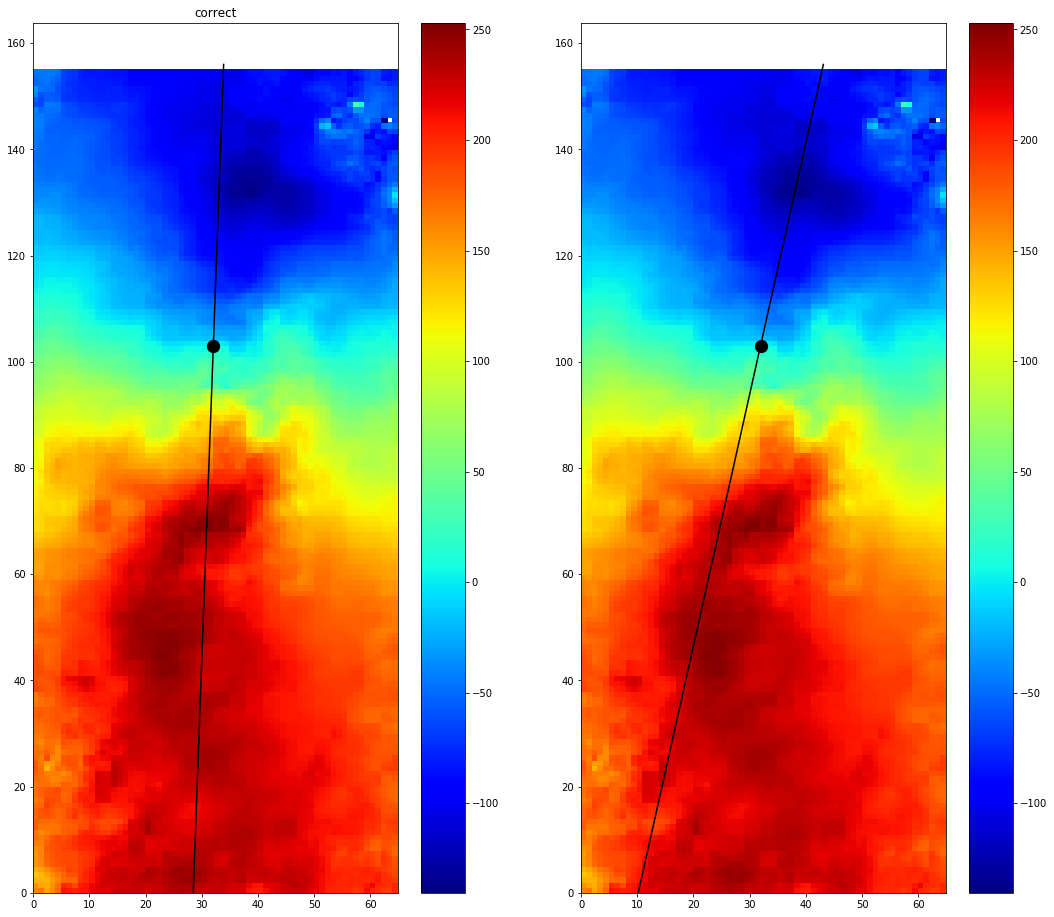

In [28]:
X,Y = np.meshgrid(np.arange(0.,len(velocity_HI[0]),1), np.arange(0.,len(velocity_HI),1))
plt.figure(figsize=[18,16])
plt.subplot(1,2,1)
quadmesh = plt.pcolormesh(X, Y, velocity_HI, cmap='jet')
plt.colorbar()
plt.scatter(32.0778305 ,103.00132757,[150.], color='black' )
plt.plot([28.48,28.48 + 155. * np.tan(2.*np.pi/180)], [0., 156], color='black')
plt.title('correct')

plt.subplot(1,2,2)
quadmesh = plt.pcolormesh(X, Y, velocity_HI, cmap='jet')
plt.colorbar()
plt.scatter(32.0778305 ,103.00132757,[150.], color='black' )
plt.plot([10.18,10.18 + 155. * np.tan(12.*np.pi/180)], [0., 156], color='black')

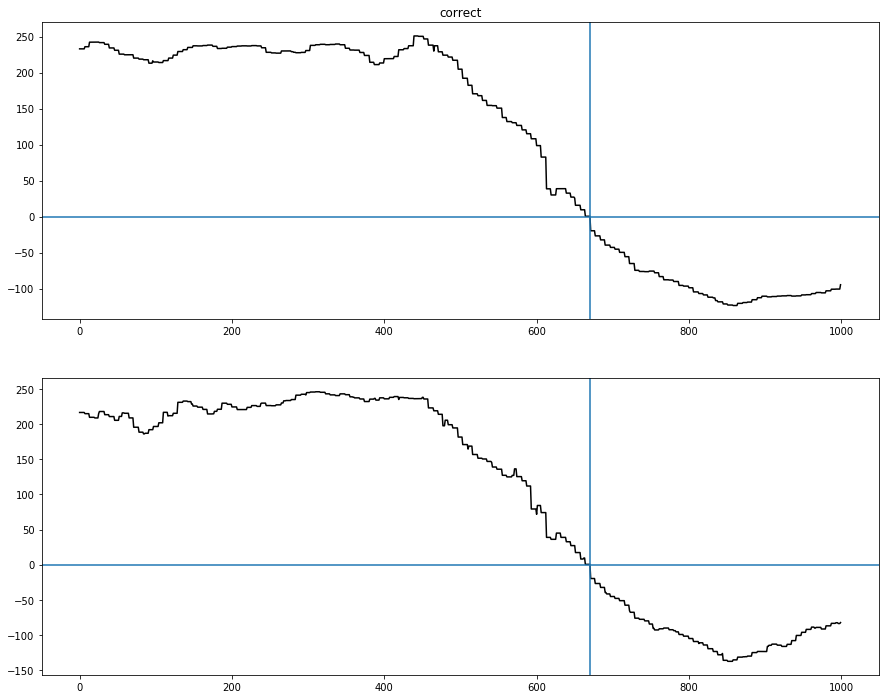

In [29]:
x0, y0 = 10.18, 0. 
x1, y1 = 10.18 + 155. * np.tan(12.*np.pi/180.),155.
num = 1000
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)
zi_cub = velocity_HI[y.astype(np.int), x.astype(np.int)]

x0_corr, y0_corr = 28.48, 0. 
x1_corr, y1_corr = 28.48 + 155. * np.tan(2.*np.pi/180.),155.
num = 1000
x_corr, y_corr = np.linspace(x0_corr, x1_corr, num), np.linspace(y0_corr, y1_corr, num)
zi_cub_corr = velocity_HI[y_corr.astype(np.int), x_corr.astype(np.int)]

fig = plt.figure(figsize = [15, 12])
plt.subplot(2,1,1)
line = plot(zi_cub_corr,'black')
plt.axhline(y=0)
plt.axvline(x = 670)

plt.title('correct')
plt.subplot(2,1,2)
line = plot(zi_cub,'black')
plt.axhline(y=0)
plt.axvline(x = 670)


In [30]:
#Определим длину нашего среза
r_vel = np.sqrt(155.**2 + (155. * np.tan(12.*np.pi/180))**2)
r_vel_corr = np.sqrt(155.**2 + (155. * np.tan(2.*np.pi/180))**2)
#Переведём в arcsec
r_vel = r_vel * 1.9
r_vel_corr = r_vel_corr * 1.9
#Найдём центр галактики на срезе
c_r_vel = 103.00132757 / math.cos(12.*np.pi/180.)
c_r_vel = c_r_vel * 1.9

c_r_vel_corr = 103.00132757 / math.cos(2.*np.pi/180.)
c_r_vel_corr = c_r_vel_corr * 1.9

In [34]:
#vel_HI = sort(np.abs(zi_cub))
#vel_HI_corr = sort(np.abs(zi_cub_corr))
print(zi_cub[668])
r_HI = sort(np.abs(np.linspace(0., r_vel, 668)-c_r_vel))
r_HI = r_HI * np.pi / (180 *3600) * Distance * 10**3 
print(len(r_HI))
r_HI_corr = sort(np.abs(np.linspace(0., r_vel_corr, 668)-c_r_vel_corr))
r_HI_corr = r_HI_corr * np.pi / (180 *3600) * Distance * 10**3 

vel_HI[0:332] = (np.abs(zi_cub[668:668+332])+zi_cub[667:667-332:-1])/2.
vel_HI[332:668] = zi_cub[667-332::-1]

vel_HI_corr = np.zeros(668)
vel_HI_corr[0:332] = (np.abs(zi_cub_corr[668:668+332])+zi_cub_corr[667:667-332:-1])/2.
vel_HI_corr[332:668] = zi_cub_corr[667-332::-1]
print(len(vel_HI_corr))

0.49937052
668
668


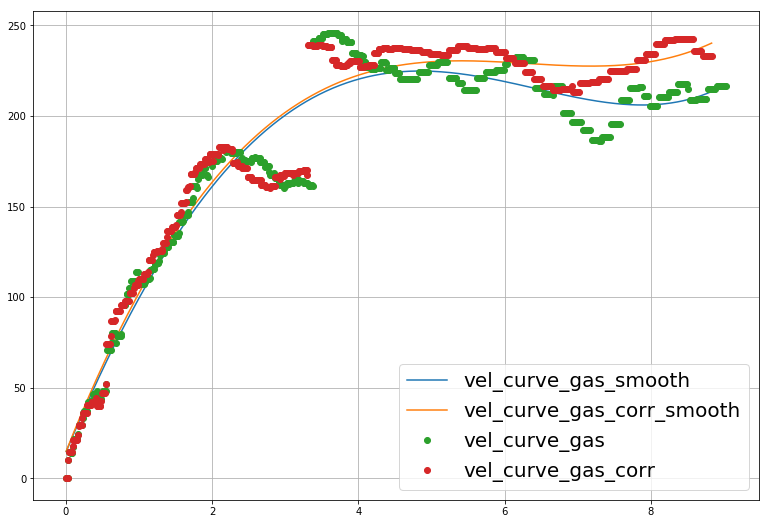

In [37]:
points = np.linspace(min(r_HI), max(r_HI), 668)
velocity_approx = poly1d(polyfit(r_HI, vel_HI[0:668], deg=4))

points_corr = np.linspace(min(r_HI_corr), max(r_HI_corr), 668)
velocity_approx_corr = poly1d(polyfit(r_HI_corr, vel_HI_corr[0:668], deg=4))

fig, ax = plt.subplots(figsize=[13,9])
line1 = ax.plot(points, velocity_approx(points), label='vel_curve_gas_smooth')
line2 = ax.plot(points_corr, velocity_approx_corr(points_corr), label='vel_curve_gas_corr_smooth')
line3 = ax.plot(r_HI,vel_HI[0:668],'o',label = 'vel_curve_gas')
line4 = ax.plot(r_HI_corr,vel_HI_corr[0:668],'o',label = 'vel_curve_gas_corr' )
plt.legend(loc='lower right',fontsize=20)
plt.grid()

0.04508767234318684


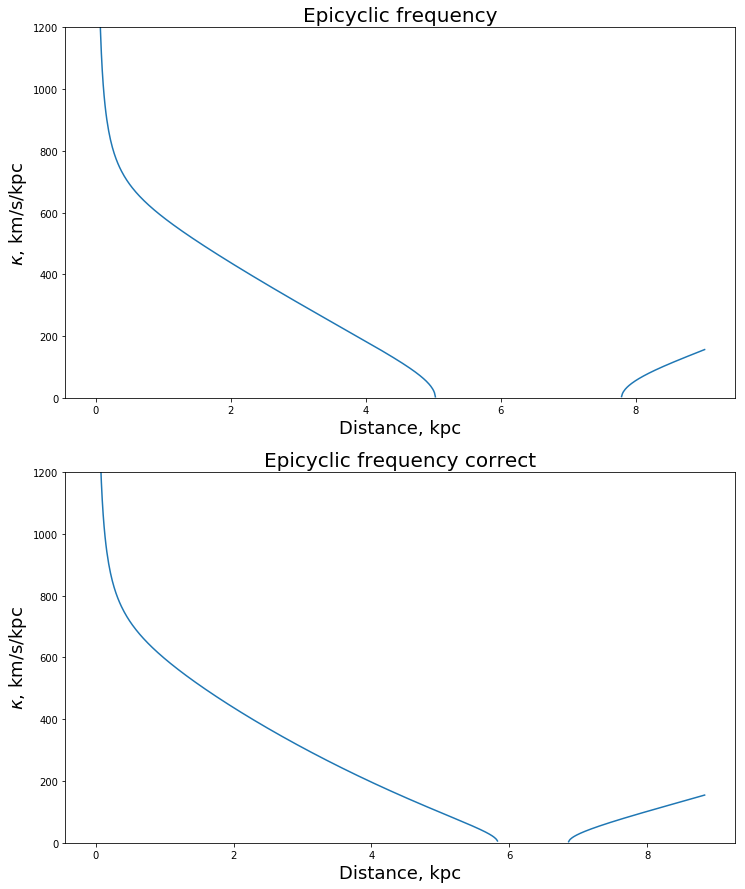

In [38]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
print(dR)
kappa = [functions.epic_freq(velocity_approx, r, dR) for r in points]
kappa_corr = [functions.epic_freq(velocity_approx_corr, r, dR) for r in points_corr]

fig = plt.figure(figsize = [12,15])
plt.subplot(2,1,1)
plt.plot(points, kappa) 
plt.title('Epicyclic frequency',fontsize = 20)
plt.ylabel('$\kappa$, km/s/kpc', fontsize = 18)
plt.xlabel('Distance, kpc', fontsize = 18)
plt.ylim(0, 1200.)
plt.show

plt.subplot(2,1,2)
plt.plot(points_corr, kappa_corr) 
plt.title('Epicyclic frequency correct',fontsize = 20)
plt.ylabel('$\kappa$, km/s/kpc', fontsize = 18)
plt.xlabel('Distance, kpc', fontsize = 18)
plt.ylim(0, 1200.)
plt.show()

Соответственно у меня и в при подсчёте параметра Тумре получаюся не очень хорошие карты, причём это проблема не исчезает, если я меняю степень интерполяции.

## velocity curve

- Кривая вращения из [статьи](https://arxiv.org/pdf/1312.0604.pdf)
- Кривая скоростей атомарного газа H2
- Параметры галактики из статьи:
 - PA = 175;
 
 - i = 65;
 
 - scale = 0.049 kpc/arcsec

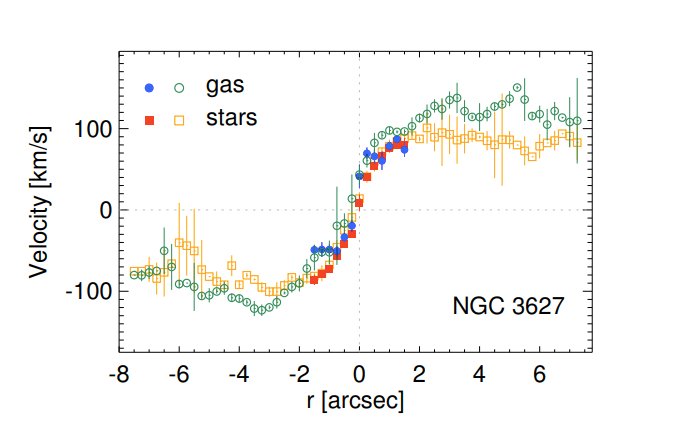

In [39]:
Image(filename = './images/vel_curve_1312.png')

In [40]:
vel_curve_1312_ = [0.026905829596413, 42.66367713004479,
0.2690582959641272, 58.62331838565015,
0.5112107623318387, 81.58295964125554,
0.753363228699552, 90.54260089686093,
1.0224215246636774, 96.49775784753362,
1.2645739910313907, 95.45739910313895,
1.506726457399104, 95.41704035874434,
1.7488789237668172, 101.3766816143497,
2.017937219730941, 111.33183856502237,
2.260089686098654, 116.29147982062773,
2.502242152466369, 127.25112107623312,
2.7443946188340806, 122.21076233183851,
2.986547085201794, 133.17040358744387,
3.2556053811659194, 135.12556053811653,
3.497757847533631, 120.0852017937219,
3.739910313901344, 113.04484304932728,
4.008968609865471, 110.99999999999991,
4.251121076233185, 116.9596412556053,
4.466367713004486, 125.92376681614343,
4.7892376681614355, 125.8699551569506,
5.0044843049327365, 136.8340807174887,
5.246636771300446, 147.79372197309408,
5.4887892376681595, 131.75336322869947,
5.730941704035876, 113.71300448430483,
6.000000000000002, 116.66816143497749,
6.2421524663677115, 102.62780269058285,
6.484304932735425, 118.58744394618824,
6.726457399103138, 110.5470852017936,
6.9955156950672635, 106.50224215246627,
7.264573991031389, 106.4573991031389,
-0.26905829596412545, 12.71300448430489,
-0.5112107623318369, -17.24663677130053,
-0.726457399103138, -25.210762331838623,
-1.0224215246636774, -52.16143497757855,
-1.237668161434975, -52.125560538116645,
-1.47982062780269, -62.085201793722035,
-1.7488789237668154, -73.04035874439472,
-1.9641255605381147, -93.00448430493282,
-2.23318385650224, -96.95964125560545,
-2.4753363228699534, -102.91928251121084,
-2.771300448430491, -113.86995515695071,
-2.95964125560538, -121.83856502242156,
-3.201793721973093, -123.79820627802701,
-3.4439461883408047, -122.75784753363234,
-3.7668161434977563, -114.70403587443957,
-4.008968609865469, -109.6636771300449,
-4.251121076233181, -109.62331838565024,
-4.520179372197307, -97.57847533632298,
-4.816143497757845, -102.5291479820628,
-5.031390134529145, -106.93273542601,
-5.2735426008968584, -106.45291479820634,
-5.515695067264571, -92.41255605381167,
-5.757847533632284, -89.37219730941712,
-5.999999999999997, -94.33183856502245,
-6.2152466367712975, -70.29596412556054,
-6.484304932735424, -52.251121076233176,
-6.726457399103136, -76.21076233183862,
-7.022421524663674, -77.1614349775785,
-7.210762331838562, -82.13004484304935,
-7.479820627802687, -81.08520179372198
]

In [41]:
vel_curve_1312 = [abs(i) for i in vel_curve_1312_]
r_1312_ = vel_curve_1312[0::2]
r_1312 =  sort(np.abs(r_1312_))
v_1312_ = []
for r in r_1312:
    i = vel_curve_1312.index(r)
    v_1312_.append(vel_curve_1312[i+1])

v_1312 = v_1312_ / np.sin(65*np.pi/180.)
r_1312 = r_1312 * 0.045



Text(0, 0.5, 'velocity/sin(i)')

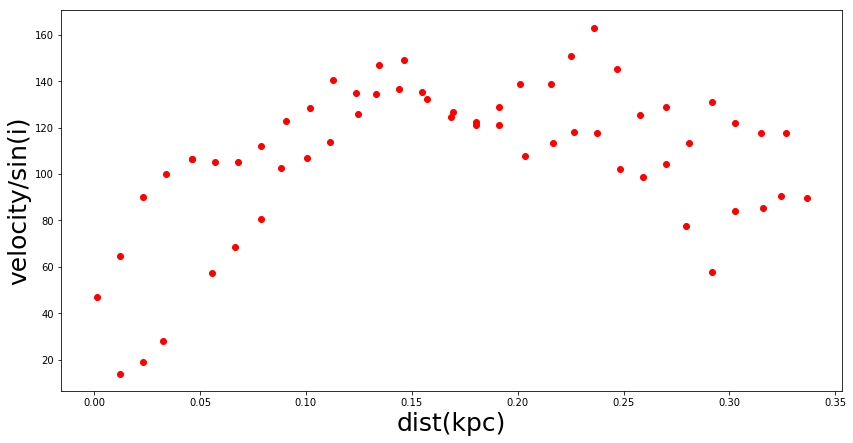

In [42]:
plt.figure(figsize=[14,7])
plt.plot(r_1312,v_1312,'o', color='red')
plt.xlabel('dist(kpc)',fontsize=25)
plt.ylabel('velocity/sin(i)',fontsize=25)

- Кривая вращения из [статьи](https://arxiv.org/pdf/2005.11709.pdf)
- Кривая скоростей CO(2-1)
- Параметры галактики из статьи:
 - PA =  173.1;
 
 - i = 57.3;
 
 - scale = 0.051 kpc/arcsec

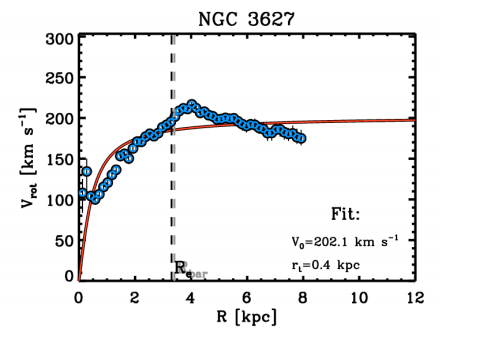

In [43]:
Image(filename = './images/vel_curve_2005.png')

In [44]:
vel_curve_2005 = [0.09600000000000009,  105.81666666666658,
0.26400000000000023,  133.29333333333332,
0.4079999999999999,  102.43999999999994,
0.552,  99.08666666666659,
0.6960000000000002,  100.89999999999998,
0.8639999999999999,  113.20999999999995,
1.008,  119.02333333333331,
1.1519999999999997,  128.16999999999996
,1.2959999999999998,  134.8166666666666
,1.464,  152.2933333333333
,1.6320000000000001,  154.76999999999998
,1.7520000000000002,  148.08666666666664
,1.9440000000000004,  161.39333333333332
,2.0639999999999996,  170.5433333333333
,2.2319999999999998,  168.8533333333333
,2.376,  176.33333333333331
,2.52,  179.64666666666662
,2.6879999999999993,  176.28999999999996
,2.8080000000000003,  181.2733333333333
,2.9759999999999995,  187.91666666666663
,3.1199999999999997,  192.06333333333333
,3.288,  194.53999999999996
,3.384,  200.35999999999996
,3.527999999999999,  207.83999999999997
,3.7439999999999993,  210.30999999999997
,3.9119999999999995,  210.28666666666663
,4.007999999999999,  215.2733333333333
,4.176,  211.91666666666663
,4.295999999999999,  204.39999999999998
,4.464,  206.87666666666667
,4.632,  202.68666666666664
,4.776,  200.16666666666663
,4.919999999999998,  196.8133333333333
,5.087999999999999,  196.78999999999996
,5.183999999999999,  198.44333333333333
,5.3759999999999994,  197.58333333333331
,5.543999999999999,  199.22666666666666
,5.687999999999999,  195.04
,5.807999999999998,  191.69
,5.975999999999999,  188.33333333333331
,6.095999999999998,  191.65
,6.2879999999999985,  189.95666666666665
,6.359999999999999,  185.78
,6.599999999999998,  184.91333333333333
,6.719999999999999,  180.73
,6.863999999999999,  181.54333333333335
,7.007999999999999,  184.85666666666665
,7.1999999999999975,  185.66333333333333
,7.3199999999999985,  180.64666666666668
,7.463999999999999,  179.79333333333332
,7.631999999999998,  180.60333333333332
,7.799999999999999,  174.74666666666667
,7.943999999999999,  173.89333333333335
]

In [45]:
r_2005_ = vel_curve_2005[0::2]
r_2005 = np.abs(r_2005_) / 0.051 * 0.045

In [46]:
v_2005 = vel_curve_2005[1::2] / np.sin(57.3*np.pi/180.)

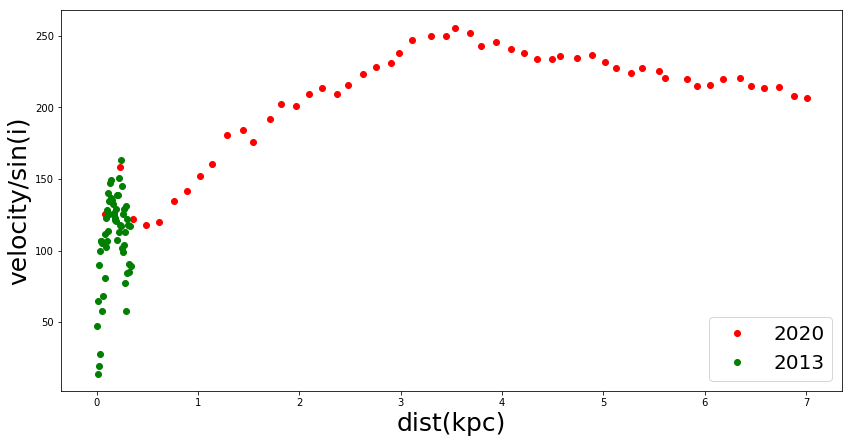

In [47]:
plt.figure(figsize=[14,7])
plt.plot(r_2005,v_2005,'o', color='red',label='2020')
plt.plot(r_1312,v_1312,'o', color='green', label='2013')
plt.xlabel('dist(kpc)',fontsize=25)
plt.ylabel('velocity/sin(i)',fontsize=25)
plt.legend(loc='lower right',fontsize=20)

- Кривая вращения из [статьи](https://arxiv.org/pdf/0810.2100.pdf)
- Кривая скоростей HI
- Параметры галактики из статьи:
 - PA =  173.0;
 
 - i = 61.8;
 
 - scale = 0.045 kpc/arcsec

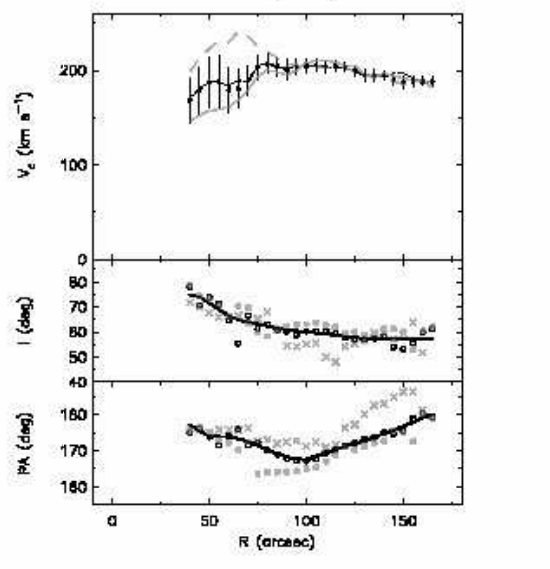

In [48]:
Image(filename = './images/vel_curve_08.png')

In [49]:
vel_curve_0810 = [40.55555555555556, 169.7674418604651
,44.44444444444444, 177.90697674418604
,46.11111111111113, 182.5581395348837
,50, 188.37209302325581
,55.55555555555556, 189.53488372093022
,60, 179.06976744186045
,65, 181.39534883720933
,70.55555555555554, 191.86046511627907
,74.99999999999999, 204.65116279069767
,80.00000000000001, 208.13953488372093
,84.44444444444444, 204.65116279069767
,90.00000000000001, 202.32558139534882
,94.99999999999999, 204.65116279069767
,100.00000000000001, 205.8139534883721
,105.55555555555553, 205.8139534883721
,109.44444444444444, 204.65116279069767
,114.99999999999999, 204.65116279069767
,119.44444444444444, 203.48837209302326
,124.99999999999999, 202.32558139534882
,129.44444444444446, 196.51162790697674
,133.88888888888886, 195.34883720930233
,139.44444444444446, 195.34883720930233
,143.88888888888886, 190.69767441860466
,149.44444444444446, 189.53488372093022
,154.4444444444444, 190.69767441860466
,158.88888888888886, 187.2093023255814
,158.88888888888886, 187.2093023255814
,164.4444444444444, 189.53488372093022]

In [50]:
r_0810_ = vel_curve_0810[0::2]
r_0810 = np.abs(r_0810_) * 0.045
v_0810 = vel_curve_0810[1::2] / np.sin(61.8*np.pi/180.)

Text(0, 0.5, 'velocity/sin(i)')

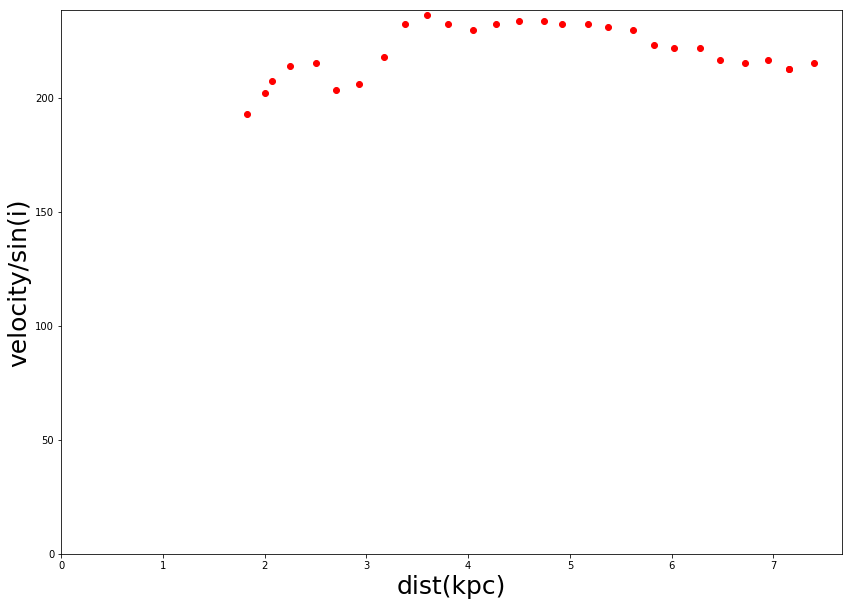

In [51]:
plt.figure(figsize=[14,10])
plt.plot(r_0810,v_0810,'o', color='red',label='2008')
plt.ylim(0,)
plt.xlim(0,)
plt.xlabel('dist(kpc)',fontsize=25)
plt.ylabel('velocity/sin(i)',fontsize=25)

- Кривая вращения из [статьи](https://arxiv.org/pdf/1609.00378.pdf)
- Кривая скоростей HI
- Параметры галактики из статьи:
 - PA =  172.0;
 
 - i = 58.0;
 
 - scale = 0.05 kpc/arcsec

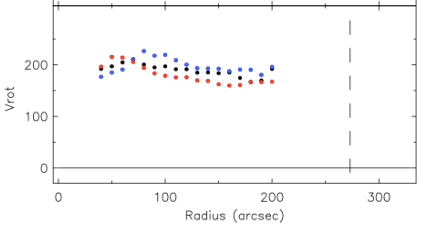

In [52]:
Image(filename = './images/vel_curve_1609.png')

In [53]:
vel_curve_1609 = [39.598910621440965, 191.46818519435502
,49.378559049269626, 196.41990591730627
,59.63852438722458, 203.38697697449862
,69.4231245357762, 207.3285466699678
,79.26714533300323, 199.14830403565236
,89.09631096806142, 193.99851448378308
,99.38103490963111, 195.91483040356522
,109.21515226541224, 189.75488982421388
,119.01955929685566, 189.65585540975485
,129.343897004209, 183.4909631096806
,139.15325575637536, 182.3817776677395
,149.4528348601139, 181.2676405050755
,159.25229017083439, 182.1787571180985
,169.59643476107948, 171.97326070809603
,188.73483535528595, 167.7395394899727
,199.41569695469178, 188.84377321119084]

In [54]:
r_1609_ = vel_curve_1609[0::2]
r_1609 = np.abs(r_1609_) * 0.05
v_1609 = vel_curve_1609[1::2] / np.sin(60.*np.pi/180.)

Text(0, 0.5, 'velocity/sin(i)')

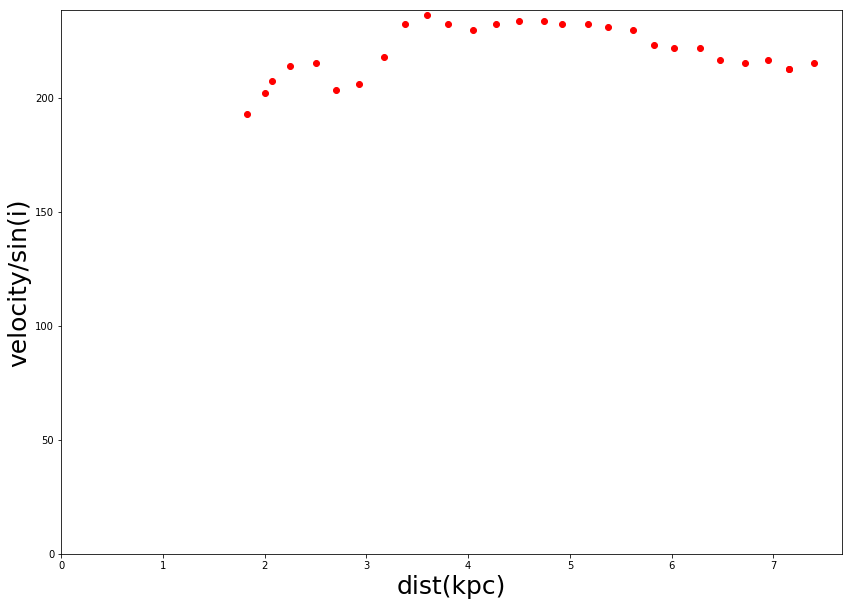

In [55]:
plt.figure(figsize=[14,10])
plt.plot(r_0810,v_0810,'o', color='red',label='2008')
plt.ylim(0,)
plt.xlim(0,)
plt.xlabel('dist(kpc)',fontsize=25)
plt.ylabel('velocity/sin(i)',fontsize=25)

## Все скорости

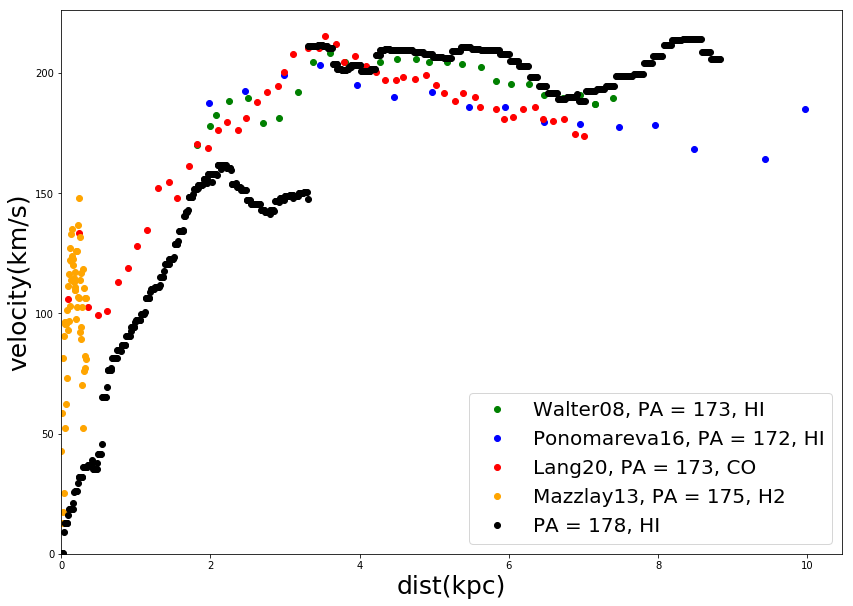

In [57]:
plt.figure(figsize=[14,10])
plt.plot(r_0810,v_0810 * np.sin(61.8*np.pi/180.),'o', color='green',label='Walter08, PA = 173, HI')
plt.plot(r_1609,v_1609 * np.sin(58. *np.pi/180.),'o', color='blue',label='Ponomareva16, PA = 172, HI')
plt.plot(r_2005,v_2005 * np.sin(57.3*np.pi/180.),'o', color='red',label='Lang20, PA = 173, CO')
plt.plot(r_1312,v_1312 * np.sin(65.*np.pi/180.),'o', color='orange',label='Mazzlay13, PA = 175, H2')
plt.plot(r_HI_corr,vel_HI_corr[0:668]*sini,'o', color='black',label='PA = 178, HI')
plt.ylim(0,)
plt.xlim(0,)
plt.xlabel('dist(kpc)',fontsize=25)
plt.ylabel('velocity(km/s)',fontsize=25)
plt.legend(loc='lower right',fontsize=20)

# 1. Параметр Тумре

In [7]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))

In [8]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
Qeff_max = np.zeros(dist_kpc.shape)
Qeff_min = np.zeros(dist_kpc.shape)
bark = np.zeros(dist_kpc.shape)
bark_max = np.zeros(dist_kpc.shape)
Qg = np.zeros(dist_kpc.shape)
Qs_min = np.zeros(dist_kpc.shape)
Qs_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
print('Errors:{}'.format(errors))

functions.ipynb:8: RuntimeWarning: invalid value encountered in double_scalars
  ]


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:4704


/home/lera/.local/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


Text(0.5, 1.0, '$Q_{gas}$')

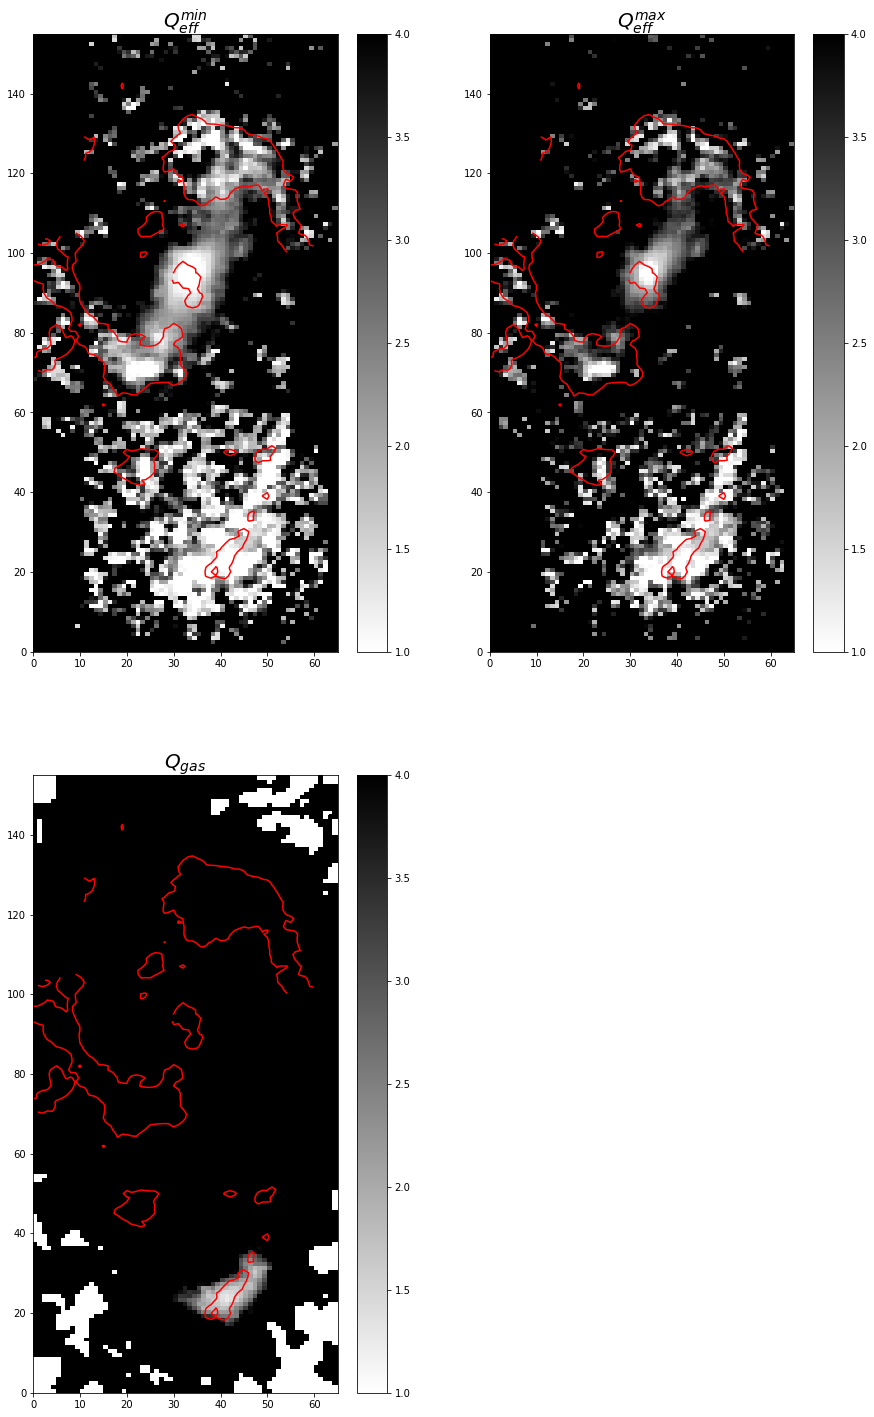

In [9]:
Sigma_SFR = np.load('./data/Sigma_SFR.npy')
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[15, 25])
plt.subplot(2,2,1)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(2,2,2)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

plt.subplot(2,2,3)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qg, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{gas}$', fontsize=20)

Ошибки дисперсии скоростей звезд. Относительная ошибка.

In [10]:
relative_error_min = np.zeros(sigma_s_err.shape)
relative_error_max = np.zeros(sigma_s_err.shape)

relative_error_max = sig_R_max_err / sig_R_max
relative_error_min = sig_R_min_err / sig_R_min

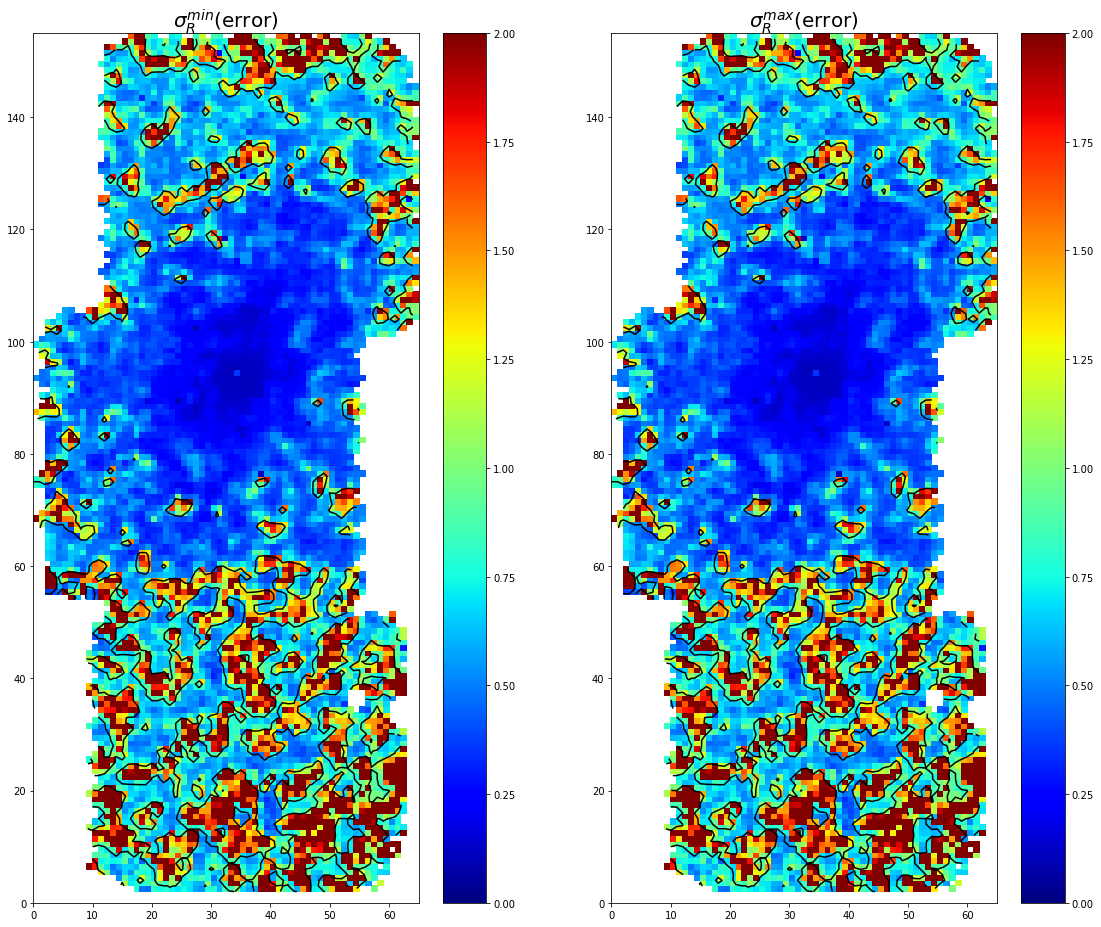

In [11]:
plt.figure(figsize=[19, 16])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, relative_error_min, levels=[1,], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, relative_error_min, cmap=cm.jet)
quadmesh.set_clim(vmin=0.0, vmax=2.)
plt.colorbar()
plt.title(r'$\sigma_R^{min}$(error)', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, relative_error_max, levels=[1,], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, relative_error_max, cmap=cm.jet)
quadmesh.set_clim(vmin=0.0, vmax=2.)
plt.colorbar()
plt.title(r'$\sigma_R^{max}$(error)',fontsize=20)
plt.show()

Text(0.5, 1.0, '$Q_{eff}^{max}$')

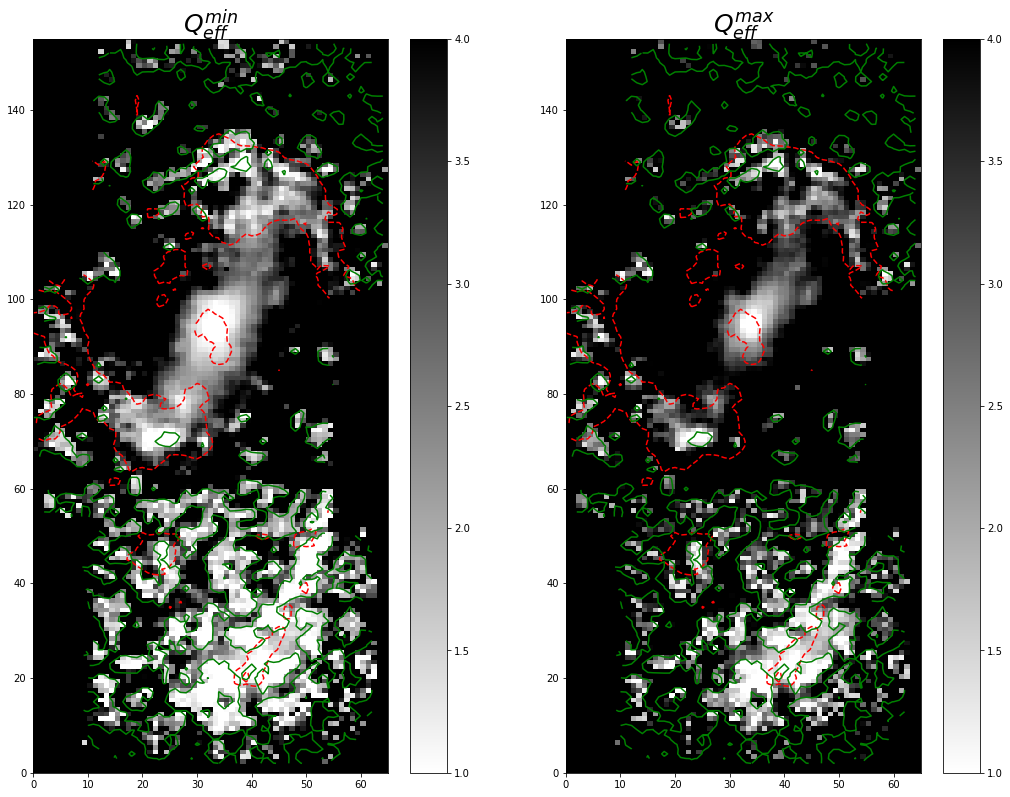

In [12]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17.5, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, relative_error_min, levels=[1,], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=25)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, relative_error_max, levels=[1,], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=25)

## Азимутальное усреднение. Сравнение с Leroy.

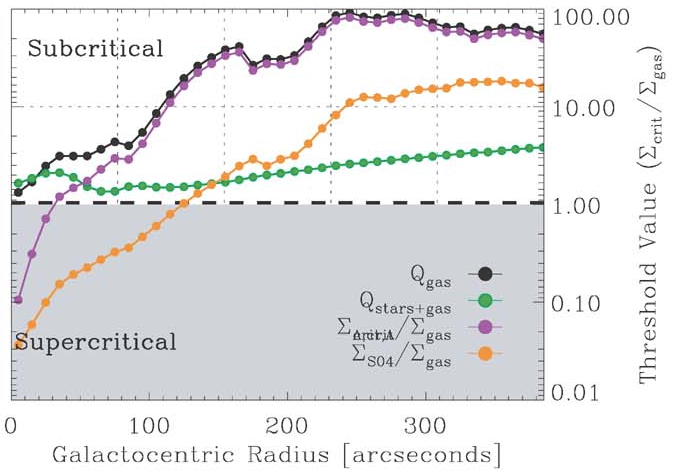

In [45]:
Image('./images/instability.png')

In [17]:
def azimuthal_average(Q, step=None, vmax=None, maxval=None, vmin=0.5):
    az_av = []
    az_dev = []
    anulli = []
    for dbin in np.arange(vmin,vmax,step):
        mask = (dist_kpc >= dbin) & (dist_kpc <= dbin + step)
        anulli = Q[mask]
        mask = (anulli < maxval) & (anulli > 0.) 
        anulli = anulli[mask]
        az_av.append(anulli.sum()/mask.sum())
        az_dev.append(np.std(anulli))
    return az_av, az_dev

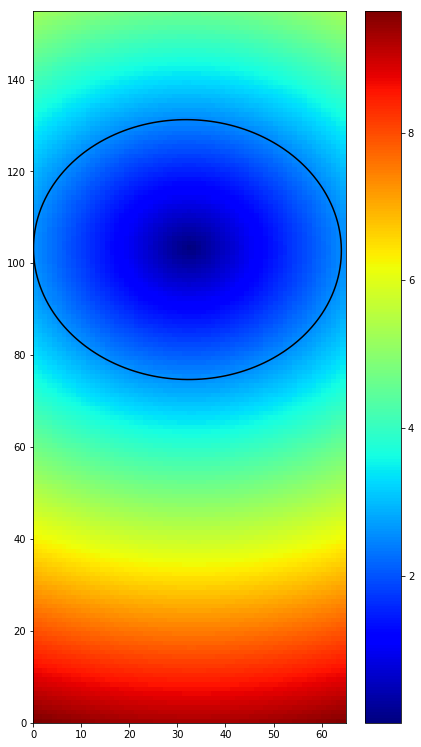

In [18]:
plt.figure(figsize=[7.,13.1])
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
CS = plt.contour(X, Y, dist_kpc, levels=[0.,2.55], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, dist_kpc, cmap='jet')
plt.colorbar()
#2.55 -масимальный радиус усреднения на кругу

In [43]:
Sigma_s = np.load('./data/Sigma_s.npy')
Sigma_H2_az = azimuthal_average(Sigma_H2, step=0.25, vmax=10., maxval = 140.)[0]
sigma_HI_az = azimuthal_average(sigma_HI/1000., step=0.25, vmax=10., maxval = 100.)[0]
Sigma_HI_az = azimuthal_average(Sigma_HI, step=0.25, vmax=10., maxval = 7.)[0]
Sigma_s_az = azimuthal_average(Sigma_s, step=0.25, vmax=10., maxval = 4000.)[0]
sig_R_max_az = azimuthal_average(sig_R_max, step=0.25, vmax=10., maxval = 300.)[0]
sig_R_min_az = azimuthal_average(sig_R_min, step=0.25, vmax=10., maxval = 300.)[0]
dist_az = np.array(np.arange(0.5,10.,0.25))

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/lera/.local/lib/python3.5/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [44]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32

Qeff_max_az = np.zeros(dist_az.shape)
Qeff_min_az = np.zeros(dist_az.shape)
Qg_az = np.zeros(dist_az.shape)
Qs_max_az = np.zeros(dist_az.shape)
Qs_min_az = np.zeros(dist_az.shape)
error = 0
step = 0
for i, ddd in enumerate(np.arange(0.5, 10., 0.25)):
    step+=1
    c = sigma_HI_az[i]
    Sigma_g = 1.36*(Sigma_HI_az[i]+ Sigma_H2_az[i])
    kappa = functions.epic_freq(velocity_approx, ddd, dR)
    Sigma_s = Sigma_s_az[i]
    s_R_max = sig_R_max_az[i]
    s_R_min = sig_R_min_az[i]
    Qg_az[i] = kappa * c / (math.pi * G * Sigma_g)
    Qs_max_az[i] = kappa * s_R_max / (3.36 * G * Sigma_s)
    Qs_min_az[i] = kappa * s_R_min / (3.36 * G * Sigma_s)
        
    try:   
        root, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min_az[i], Qg=Qg_az[i], s=c/s_R_min)
    except:
        error+=1
        qeff = 0.01
    Qeff_min_az[i] = 1./qeff
    
    try: 
        root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max_az[i], Qg=Qg_az[i], s=c/s_R_min)
    except:
        error+=1
        qeff = 0.01
    Qeff_max_az[i] = 1./qeff
print(error)  

4


(0, 40.0)

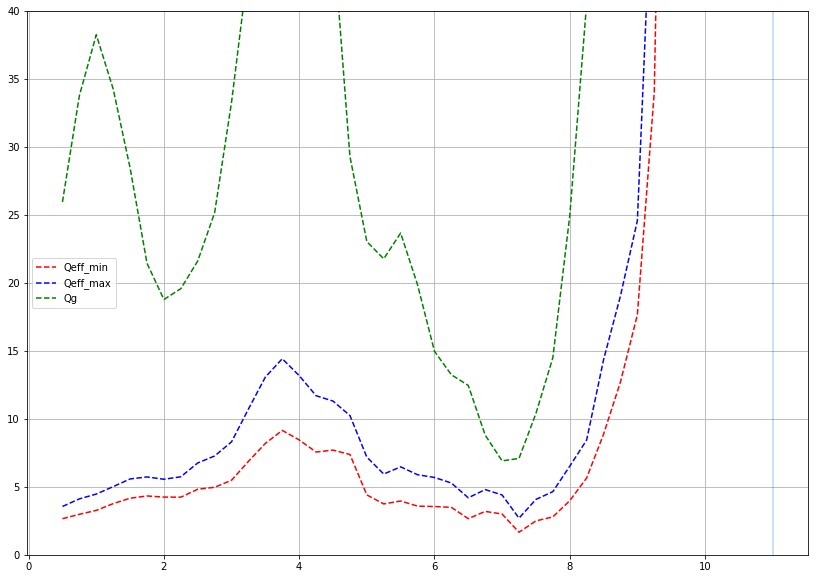

In [46]:
plt.figure(figsize=[14,10])
plt.plot(np.array(np.arange(0.5,10.,0.25)),Qeff_min_az, '--', label='Qeff_min', color='red')


plt.plot(np.array(np.arange(0.5,10.,0.25)),Qeff_max_az, '--', label='Qeff_max', color='blue')

plt.plot(np.array(np.arange(0.5,10.,0.25)),Qg_az, '--', label='Qg', color='green')
 


plt.grid()
plt.legend()
plt.axvline(x=11., alpha=0.3)
plt.ylim(0, 40.)

to do: нужно нормально оцифровать данные Леруа

# 2. Shear

$$ \Sigma_{gas} > \frac{2.5 A \sigma_{g}}{\pi G}$$

$A = 0.5 ( \dfrac{v(r_{gal})}{r_{gal}} - \dfrac{dv(r_{gal})}{dr_{gal}} ) $


In [64]:
G = 4.32
dR =(Distance*1000*2*np.pi)/(360*60*60.)
Sigma_crit = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
 
        A = 0.5 * (velocity_approx(dist_kpc[i][j]) / dist_kpc[i][j] - velocity_approx.deriv()(dist_kpc[i][j]))  
        sigma_g = sigma_HI[i][j]/1000.
  
        Sigma_crit[i][j] = 1.3 * A * sigma_g / np.pi / G

In [65]:
Inst_field = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        if(Sigma_gas > Sigma_crit[i][j]):
            Inst_field[i][j] = 1
        else: 
            Inst_field[i][j] = 0

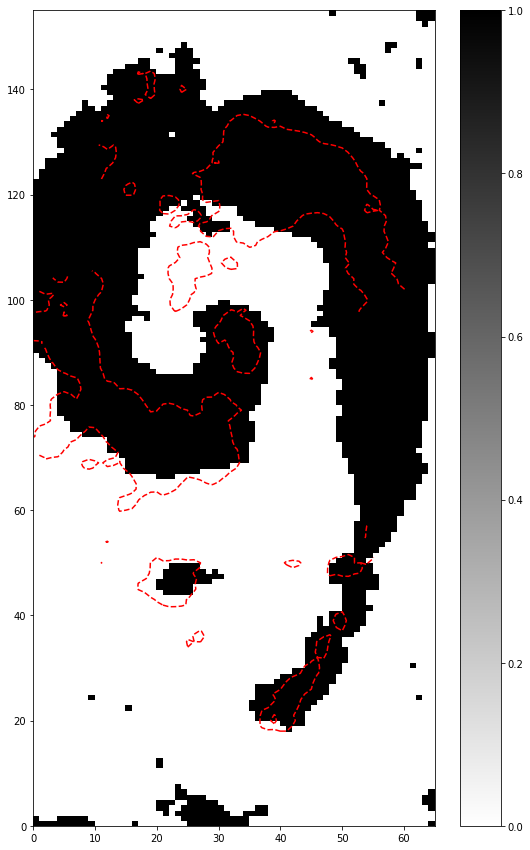

In [66]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
plt.colorbar()

In [67]:
shear_method = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        shear_method[i][j] = Sigma_crit[i][j] / Sigma_gas 

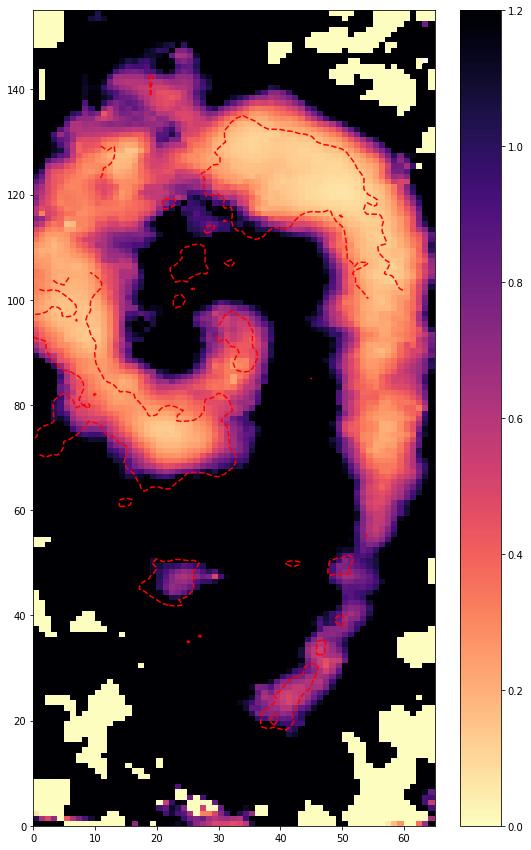

In [68]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, shear_method, cmap='magma_r')
quadmesh.set_clim(vmin = 0., vmax = 1.2)
plt.colorbar()

Построим график зависимости A(R)  

In [26]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))
A = []
R = np.array(np.linspace(0.1,10.,100))

for dist in R:
    A.append(0.5 * (velocity_approx(dist) / dist - velocity_approx.deriv()(dist)))

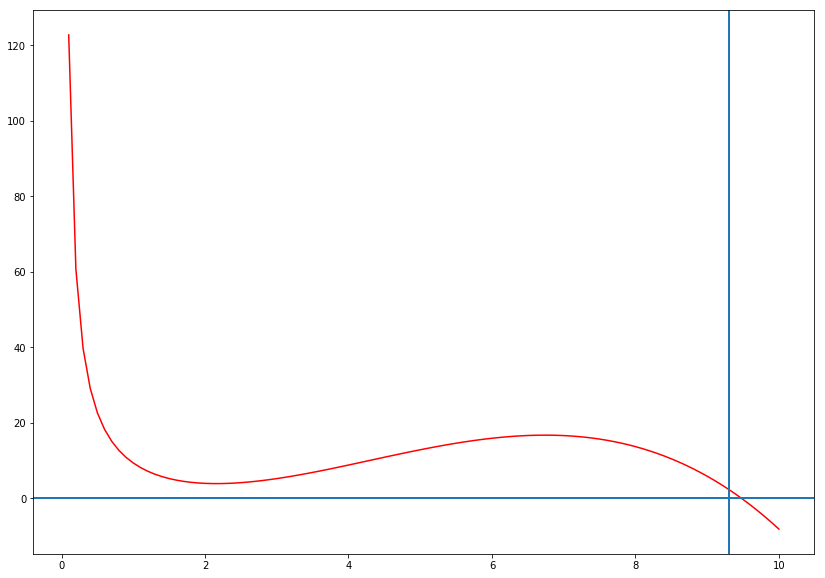

In [27]:
plt.figure(figsize=[14,10])
plt.plot(R,A, color='red')
plt.axhline(y = 0., lw = 2)
plt.axvline(x = 9.3, lw = 2)

# 3. Cold phase

$$ \Sigma_{SO_4} = \dfrac{6.1}{M_{\odot} pc^{-2}} f_g^{0.3}\left(\dfrac{Z}{0.1 Z_{\odot}}\right)^{-0.3} \left(\dfrac{I}{10^6 cm^{-2}s^{-1}}\right)^{0.23} $$

$$f_g = \dfrac{\Sigma_{gas}}{\Sigma_{gas}+\Sigma_{star}}$$

$$I = 10^6 cm^{-2}s^{-1}\left(\dfrac{\Sigma_{SFR}}{5\cdot 10^4 M_{\odot} yr^{-1} pc^{-2}}\right) $$

Если $\Sigma_{gas} > \Sigma_{SO_4}$, то облать гравитационно нестабильна

In [33]:
cold_phase = np.zeros(dist_kpc.shape)
I = np.zeros(dist_kpc.shape)
I = Sigma_SFR * 5. * 10**10
Z_sun = 0.012
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36 * (Sigma_HI[i][j]+Sigma_H2[i][j])
        f = Sigma_gas / (Sigma_gas + Sigma_s[i][j])
        Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I[i][j], 0.23,dtype = np.float)
        cold_phase[i][j] = Sigma_SO / Sigma_gas  * np.power(Z[i][j]/Z_sun/0.1, -0.3,dtype = np.float) 

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.


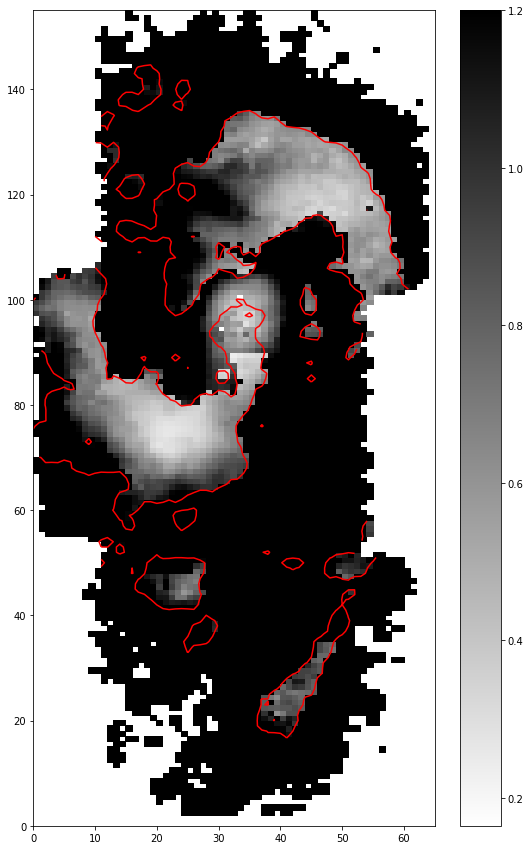

In [34]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.021,], aspect='auto', alpha=1, colors='red')
#CS = plt.contour(X, Y, Z, levels=[0,1], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, cold_phase, cmap='gist_yarg')

quadmesh.set_clim( vmax = 1.2)
plt.colorbar()

In [35]:
Inst_field = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(0. < cold_phase[i][j] <= 1.):
            Inst_field[i][j] = 1
        if(cold_phase[i][j] > 1.): 
            Inst_field[i][j] = 0
        if(Z[i][j] == NAN):
            Inst_field[i][j] = NAN

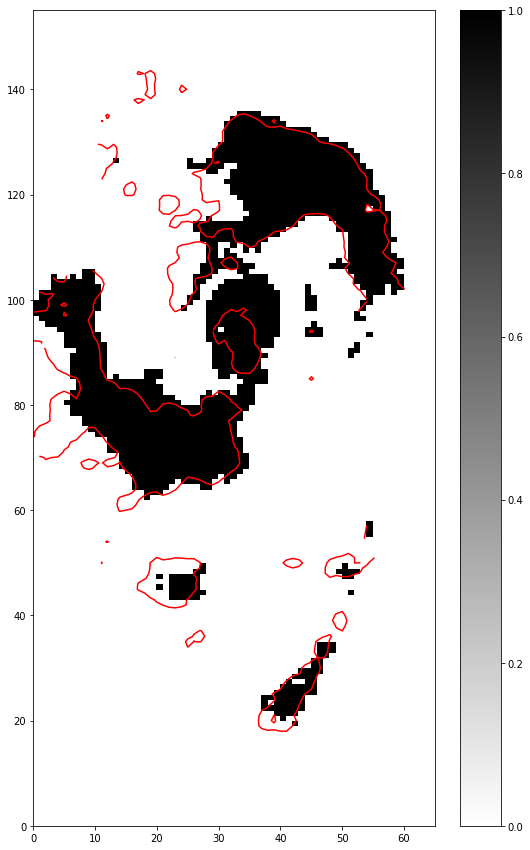

In [36]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.032,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
plt.colorbar()

## Модель Romeo

In [115]:
G = 4.32
Qeff_max_rom = np.zeros(dist_kpc.shape)
Qeff_min_rom = np.zeros(dist_kpc.shape)
rom_comp_min = np.zeros(dist_kpc.shape)
rom_comp_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print (step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        try:
            rom_max, comp = functions.romeo_Qinv(r=None, epicycl=kappa, sound_vel_CO=c, sound_vel_HI=c, 
                            sigma_R=s_R_max, 
                            star_density=Sigma_s[i][j], HI_density=Sigma_HI[i][j], CO_density=Sigma_H2[i][j], 
                            alpha=0.3, thin=True, verbose=False)
        except ValueError:
            errors+=1
            rom_max = 0.01
            comp = 'error'
        Qeff_max_rom[i][j] = 1./rom_max
        if comp == 'star':
            marker = 1
        elif comp == 'HI':
            marker = 2
        elif comp == 'H2':
            marker = 3
        elif comp == 'error':
            marker = 0
        rom_comp_max[i][j] = marker
        
        try:
            rom_min, comp = functions.romeo_Qinv(r=None, epicycl=kappa, sound_vel_CO=c, sound_vel_HI=c, 
                            sigma_R=s_R_min, 
                            star_density=Sigma_s[i][j], HI_density=Sigma_HI[i][j], CO_density=Sigma_H2[i][j], 
                            alpha=0.7, thin=True, verbose=False)
        except ValueError:
            errors+=1
            rom_min = 0.01
            comp = 'error'
        Qeff_min_rom[i][j] = 1./rom_min
        if comp == 'star':
            marker = 1
        elif comp == 'HI':
            marker = 2
        elif comp == 'H2':
            marker = 3
        elif comp == 'error':
            marker = 0
        rom_comp_min[i][j] = marker

        
print ('Errors:{}'.format(errors))

functions.ipynb:39: RuntimeWarning: invalid value encountered in double_scalars
  "    X,Y=np.meshgrid(np.arange(0,width,1),np.arange(0,height,1))\n",


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:0


Text(0.5, 1.0, 'rom_comp_min')

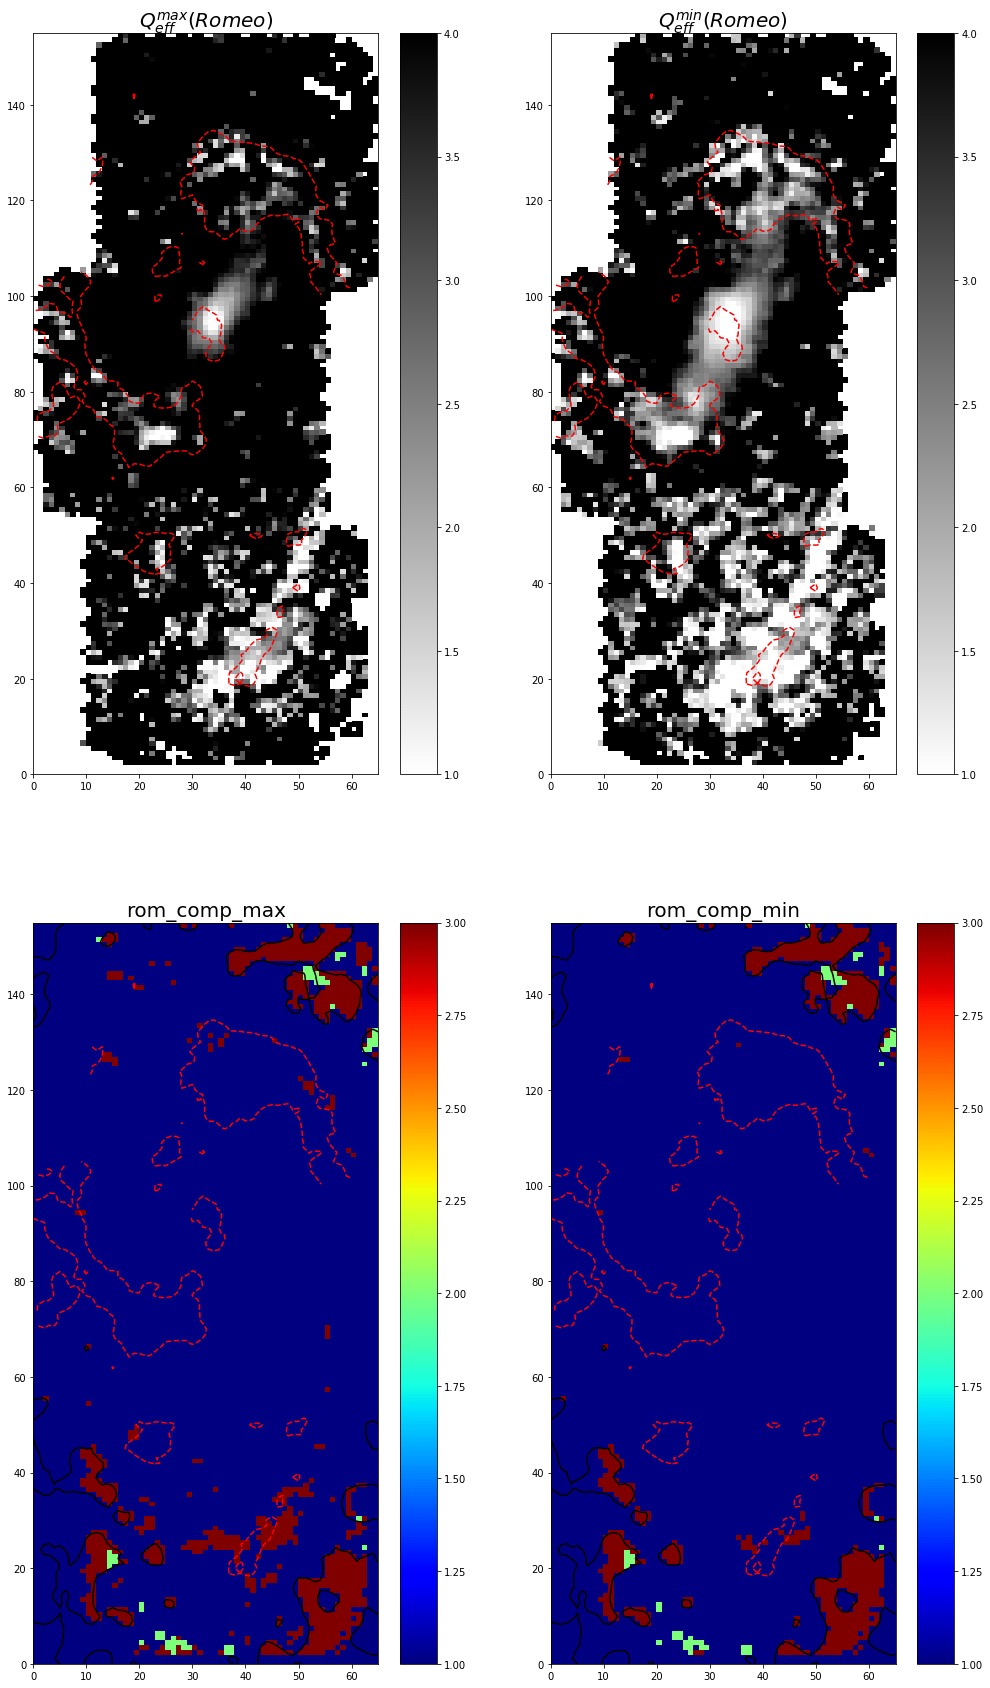

In [116]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 30])
plt.subplot(2,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.15,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_rom, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}(Romeo)$', fontsize=20)

plt.subplot(2,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.15,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y,Qeff_min_rom, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}(Romeo)$', fontsize=20)

plt.subplot(2,2,3)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.15,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, Sigma_H2, levels=[-10,0], aspect='auto', alpha=1, colors='black')
#CS = plt.contour(X, Y, Sigma_HI, levels=[-10,0], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, rom_comp_max, cmap='jet')
#quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
plt.title('rom_comp_max', fontsize=20)

plt.subplot(2,2,4)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.15,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, Sigma_H2, levels=[-10,0], aspect='auto', alpha=1, colors='black')
#CS = plt.contour(X, Y, Sigma_HI, levels=[-10,0], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y,rom_comp_min, cmap='jet')
#quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'rom_comp_min', fontsize=20)


# Статистика.

$$precision = \frac{TP}{TP+FP}$$ 

$$recall = \frac{TP}{TP+FN}$$ 

$$F1 = 2 \frac{precision \cdot recall}{precision + recall}$$

## Для Тумре

In [47]:
precision3_cut=[]
recall3_cut = []
F13_cut = []
qlim = 3.
for i, hlim in enumerate(np.linspace(-14.5, -13.2, 50)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            if (k > 60):
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1 
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
    precision3_cut.append(TP/(TP + FP))
    recall3_cut.append(TP/(TP + FN))
    F13_cut.append(2*precision3_cut[i] * recall3_cut[i]/(precision3_cut[i] + recall3_cut[i]))

In [48]:
precision3=[]
recall3 = []
F13 = []
qlim = 3.
for i, hlim in enumerate(np.linspace(-14.5, -13.2, 50)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1 
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
    precision3.append(TP/(TP + FP))
    recall3.append(TP/(TP + FN))
    F13.append(2*precision3[i] * recall3[i]/(precision3[i] + recall3[i]))

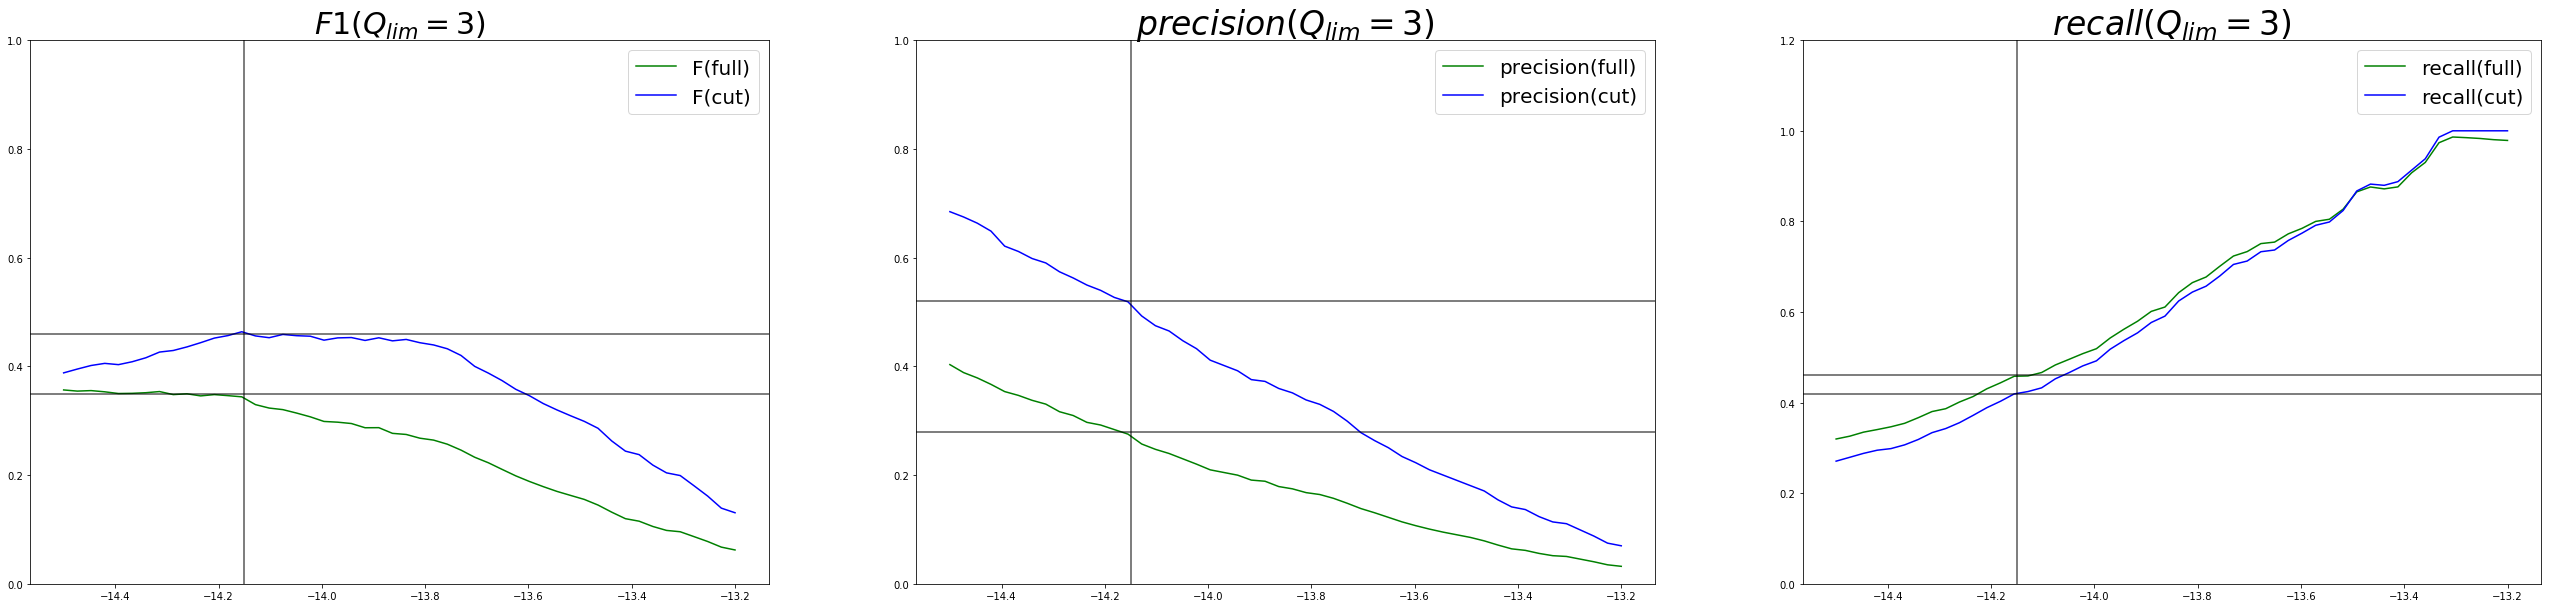

In [54]:
xx =np.array(np.linspace(-14.5, -13.2, 50))
fig = plt.figure(figsize=[45, 10])

plt.subplot(1,3,1)
plt.plot(xx,F13,'-', label='F(full)', color='green')
plt.plot(xx,F13_cut,'-', label='F(cut)', color='blue')
plt.ylim(0.,1.)
plt.title(r'$F1(Q_{lim} = 3)$', fontsize=30)
plt.axvline(x=-14.15, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.46, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.35, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,2)
plt.plot(xx,precision3,'-', label='precision(full)', color='green')
plt.plot(xx,precision3_cut,'-', label='precision(cut)', color='blue')
plt.title(r'$precision(Q_{lim} = 3)$', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=-14.15, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.52, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.28, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,3)
plt.plot(xx,recall3,'-', label='recall(full)', color='green')
plt.plot(xx,recall3_cut,'-', label='recall(cut)', color='blue')
plt.title(r'$recall(Q_{lim} = 3)$', fontsize=33)
plt.ylim(0.,1.2)
plt.axvline(x=-14.15, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.42, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.46, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)

## shear

In [69]:
G = 4.32
dR =(Distance*1000*2*np.pi)/(360*60*60.)
Sigma_crit = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
 
        A = 0.5 * (velocity_approx(dist_kpc[i][j]) / dist_kpc[i][j] - velocity_approx.deriv()(dist_kpc[i][j]))  
        sigma_g = sigma_HI[i][j]/1000.
  
        Sigma_crit[i][j] = A * sigma_g / np.pi / G # без умножения на alpha_A
    
shear_method = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        shear_method[i][j] = Sigma_crit[i][j] / Sigma_gas 

In [70]:
precision_shear_cut=np.zeros((50,6))
recall_shear_cut = np.zeros((50,6))
F1_shear_cut = np.zeros((50,6))

for i, alpha_A in enumerate(np.linspace(1., 4., 50)):
    for j, hlim in enumerate(np.linspace(-14.4, -14.10, 6)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                if (k > 57) & (np.nan_to_num(H_alpha)[k][l] != 0):
                    if (alpha_A*shear_method[k][l] <= 1) & (np.log10(H_alpha[k][l]) >= hlim):
                        TP+=1
                    
                    if (alpha_A*shear_method[k][l] >= 1) & (np.log10(H_alpha[k][l]) >= hlim):  
                        FN+=1 
                    if (alpha_A*shear_method[k][l] <= 1) & (np.log10(H_alpha[k][l]) <= hlim):
                        FP+=1
         
        precision_shear_cut[i][j] = TP/(TP + FP)
        recall_shear_cut[i][j] = TP/(TP + FN)
        F1_shear_cut[i][j] = 2*precision_shear_cut[i][j] * recall_shear_cut[i][j]/(precision_shear_cut[i][j] + recall_shear_cut[i][j])

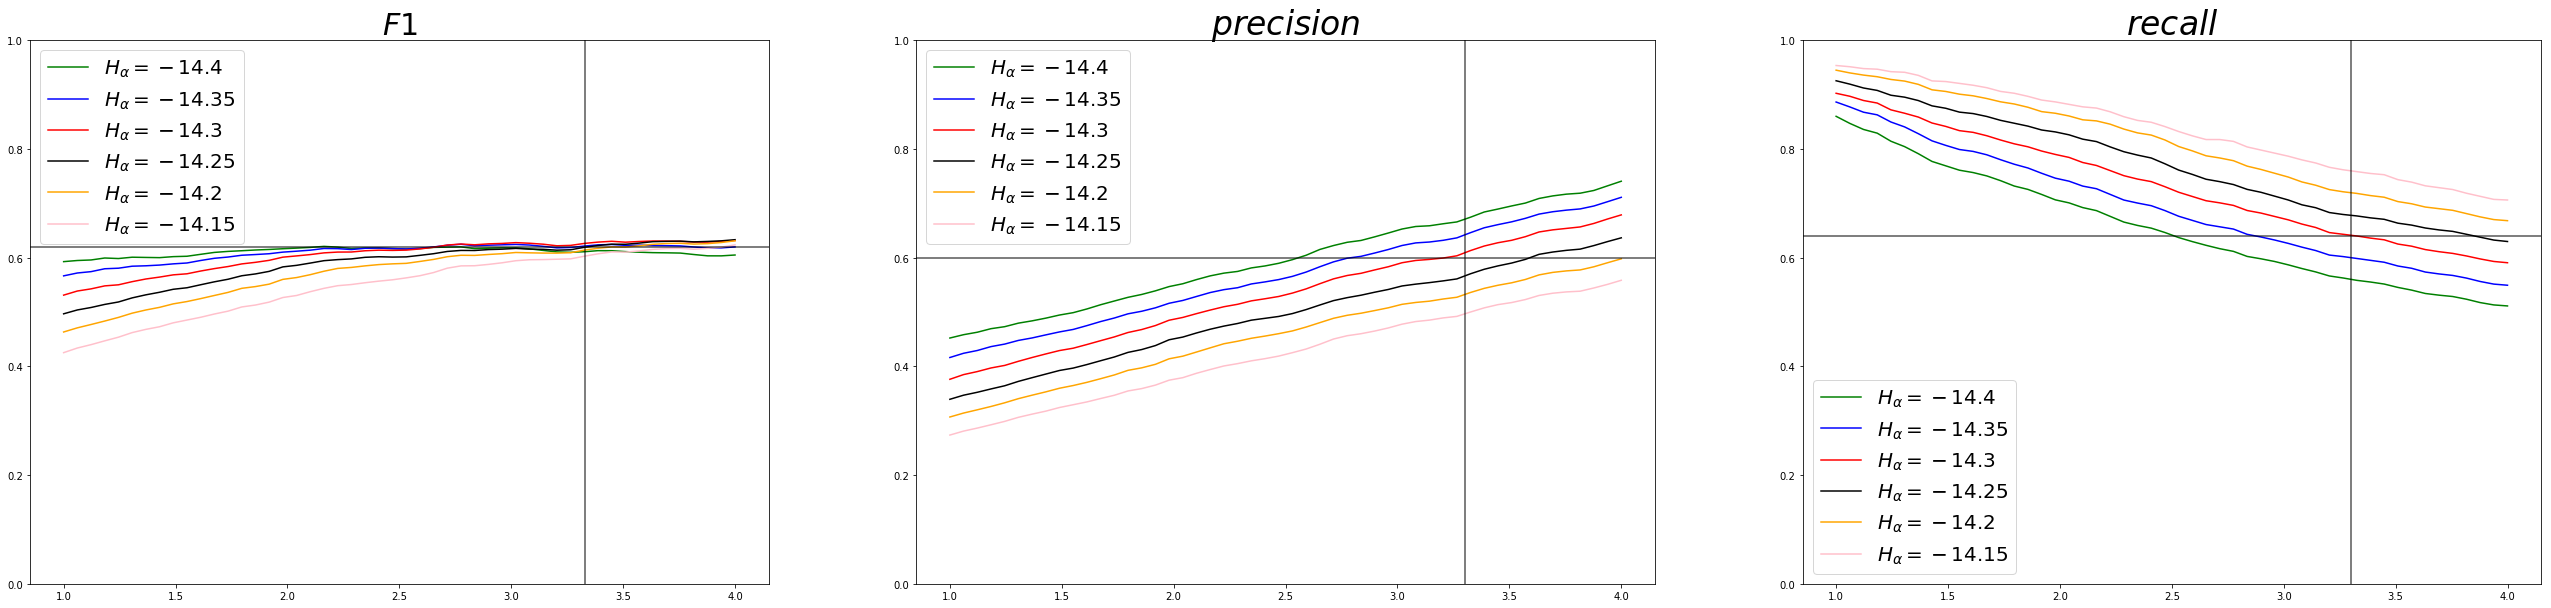

In [74]:
xx =np.array(np.linspace(1., 4., 50))
fig = plt.figure(figsize=[45, 10])

plt.subplot(1,3,1)
plt.plot(xx,F1_shear_cut[:,0],'-', label=r'$H_\alpha = -14.4$', color='green')
plt.plot(xx,F1_shear_cut[:,1],'-', label=r'$H_\alpha = -14.35$', color='blue')
plt.plot(xx,F1_shear_cut[:,2],'-', label=r'$H_\alpha = -14.3$', color='red')
plt.plot(xx,F1_shear_cut[:,3],'-', label=r'$H_\alpha = -14.25$', color='black')
plt.plot(xx,F1_shear_cut[:,4],'-', label=r'$H_\alpha = -14.2$', color='orange')
plt.plot(xx,F1_shear_cut[:,5],'-', label=r'$H_\alpha = -14.15$', color='pink')
plt.ylim(0.,1.)
plt.title(r'$F1$', fontsize=30)
plt.axvline(x=3.33, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.62, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,2)
plt.plot(xx,precision_shear_cut[:,0],'-', label=r'$H_\alpha = -14.4$', color='green')
plt.plot(xx,precision_shear_cut[:,1],'-', label=r'$H_\alpha = -14.35$', color='blue')
plt.plot(xx,precision_shear_cut[:,2],'-', label=r'$H_\alpha = -14.3$', color='red')
plt.plot(xx,precision_shear_cut[:,3],'-', label=r'$H_\alpha = -14.25$', color='black')
plt.plot(xx,precision_shear_cut[:,4],'-', label=r'$H_\alpha = -14.2$', color='orange')
plt.plot(xx,precision_shear_cut[:,5],'-', label=r'$H_\alpha = -14.15$', color='pink')
plt.title(r'$precision$', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=3.3, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.6, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,3)
plt.plot(xx,recall_shear_cut[:,0],'-', label=r'$H_\alpha = -14.4$', color='green')
plt.plot(xx,recall_shear_cut[:,1],'-', label=r'$H_\alpha = -14.35$', color='blue')
plt.plot(xx,recall_shear_cut[:,2],'-', label=r'$H_\alpha = -14.3$', color='red')
plt.plot(xx,recall_shear_cut[:,3],'-', label=r'$H_\alpha = -14.25$', color='black')
plt.plot(xx,recall_shear_cut[:,4],'-', label=r'$H_\alpha = -14.2$', color='orange')
plt.plot(xx,recall_shear_cut[:,5],'-', label=r'$H_\alpha = -14.15$', color='pink')
plt.title(r'$recall$', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=3.3, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.64, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)

## cold phase

In [76]:
precision=[]
recall = []
F1 = []
for i, hlim in enumerate(np.linspace(-15.5, -13.2, 60)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            if (cold_phase[k][l] <= 1) & (np.log10(H_alpha[k][l]) >= hlim):
                TP+=1
                    
            if (cold_phase[k][l] > 1) & (np.log10(H_alpha[k][l]) >= hlim):  
                FN+=1 
            if (cold_phase[k][l] <= 1) & (np.log10(H_alpha[k][l]) <= hlim):
                FP+=1
         
    precision.append(TP/(TP + FP))
    recall.append(TP/(TP + FN))
    F1.append(2*precision[i] * recall[i]/(precision[i] + recall[i]))
    
    
cold_phase_const = np.load('./data/cold_phase_const.npy')

precision_const=[]
recall_const = []
F1_const = []
for i, hlim in enumerate(np.linspace(-15.5, -13.2, 60)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            if (cold_phase_const[k][l] <= 1) & (np.log10(H_alpha[k][l]) >= hlim):
                TP+=1
                    
            if (cold_phase_const[k][l] > 1) & (np.log10(H_alpha[k][l]) >= hlim):  
                FN+=1 
            if (cold_phase_const[k][l] <= 1) & (np.log10(H_alpha[k][l]) <= hlim):
                FP+=1
         
    precision_const.append(TP/(TP + FP))
    recall_const.append(TP/(TP + FN))
    F1_const.append(2*precision_const[i] * recall_const[i]/(precision_const[i] + recall_const[i]))    

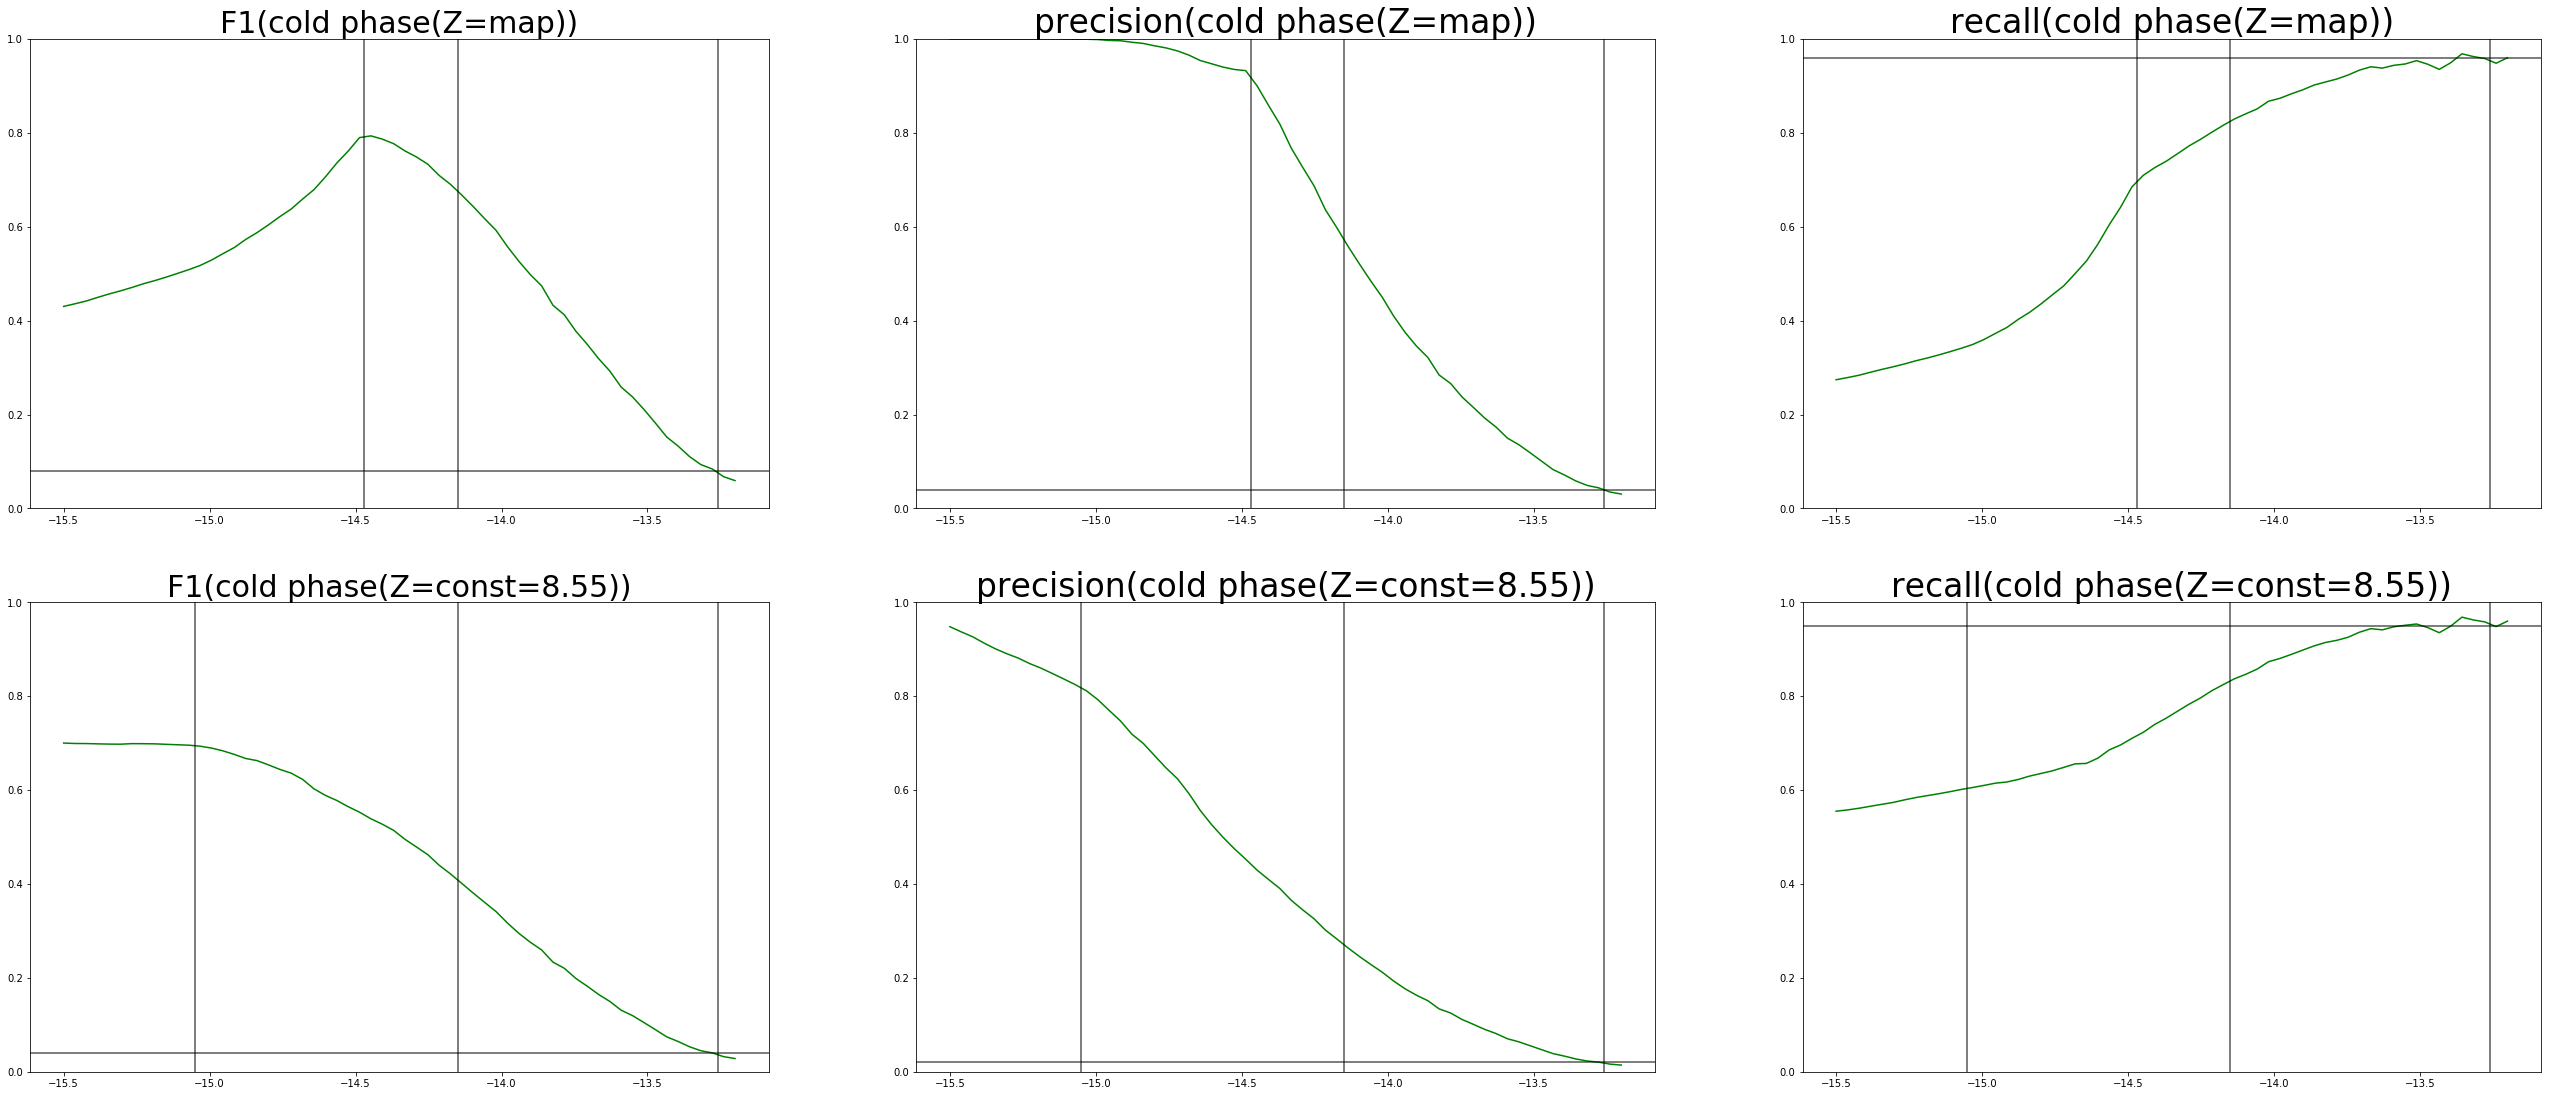

In [77]:
xx =np.array(np.linspace(-15.5, -13.2, 60))
fig = plt.figure(figsize=[45, 19])

plt.subplot(2,3,1)
plt.plot(xx,F1,'-', label='F(full)', color='green')
plt.ylim(0.,1.)
plt.title('F1(cold phase(Z=map))', fontsize=30)
plt.axvline(x=-14.47, alpha=0.5, color='black', lw=2)
plt.axvline(x=-14.15, alpha=0.5, color='black', lw=2)
plt.axvline(x=-13.26, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.08, alpha=0.5, color='black', lw=2)
          
plt.subplot(2,3,2)
plt.plot(xx,precision,'-', label='precision(full)', color='green')
plt.title('precision(cold phase(Z=map))', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=-14.47, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.04, alpha=0.5, color='black', lw=2)
plt.axvline(x=-13.26, alpha=0.5, color='black', lw=2)
plt.axvline(x=-14.15, alpha=0.5, color='black', lw=2)
          
plt.subplot(2,3,3)
plt.plot(xx,recall,'-', label='recall(full)', color='green')
plt.title('recall(cold phase(Z=map))', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=-14.47, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.96, alpha=0.5, color='black', lw=2)
plt.axvline(x=-13.26, alpha=0.5, color='black', lw=2)
plt.axvline(x=-14.15, alpha=0.5, color='black', lw=2)

plt.subplot(2,3,4)
plt.plot(xx,F1_const,'-', label='F(full)', color='green')
plt.ylim(0.,1.)
plt.title('F1(cold phase(Z=const=8.55))', fontsize=30)
plt.axvline(x=-15.05, alpha=0.5, color='black', lw=2)
plt.axvline(x=-14.15, alpha=0.5, color='black', lw=2)
plt.axvline(x=-13.26, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.04, alpha=0.5, color='black', lw=2)
          
plt.subplot(2,3,5)
plt.plot(xx,precision_const,'-', label='precision(full)', color='green')
plt.title('precision(cold phase(Z=const=8.55))', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=-15.05, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.02, alpha=0.5, color='black', lw=2)
plt.axvline(x=-13.26, alpha=0.5, color='black', lw=2)
plt.axvline(x=-14.15, alpha=0.5, color='black', lw=2)
          
plt.subplot(2,3,6)
plt.plot(xx,recall_const,'-', label='recall(full)', color='green')
plt.title('recall(cold phase(Z=const=8.55))', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=-15.05, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.95, alpha=0.5, color='black', lw=2)
plt.axvline(x=-13.26, alpha=0.5, color='black', lw=2)
plt.axvline(x=-14.15, alpha=0.5, color='black', lw=2)

# K-Sh law

### угол наклона в зависимости от $SFR^{lim}$

In [78]:
N_H2 = []
points_H2 = []
for hlim in np.array(np.linspace(-17.,-13.,80)):

    x = []
    y = []
    
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            
            if (np.log10(H_alpha[k][l]) >= hlim) & (Sigma_H2[k][l] > 0.) :
                
                x.append(np.log10(Sigma_H2[k][l]))
                y.append(np.log10(H_alpha[k][l]))
    
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(y,x)
    N_H2.append(1./gradient)
    points_H2.append(len(y))         

Text(0.5, 0, '$H_{\\alpha}^{lim}$')

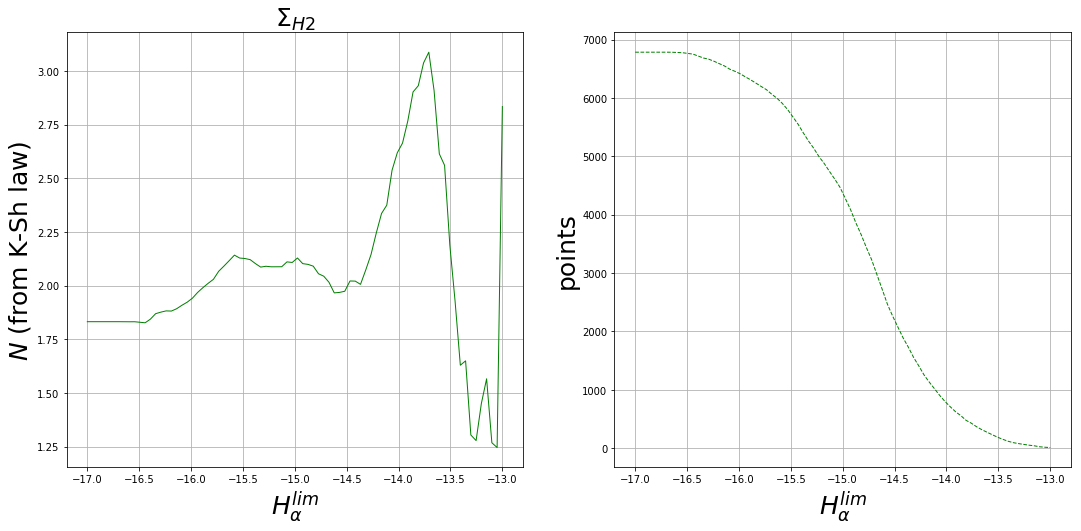

In [79]:
fig = plt.figure(figsize=[18, 8])
plt.subplot(1,2,1)
plt.plot(np.array(np.linspace(-17.,-13.,80)), N_H2, '-', lw=1, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$H_{\alpha}^{lim}$', fontsize = 25)
plt.title(r'$\Sigma_{H2}$',fontsize = 25)

plt.subplot(1,2,2)
plt.plot(np.array(np.linspace(-17.,-13.,80)),points_H2, '--', lw=1, color='g')
plt.grid()
plt.ylabel('points', fontsize = 25)
plt.xlabel(r'$H_{\alpha}^{lim}$', fontsize = 25)

In [80]:

H_alpha = np.load('./data/H_alpha.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')

N_HI = []
points_HI = []
for hlim in np.array(np.linspace(-17.,-13.,80)):

    x = []
    y = []
    
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            
            if (np.log10(H_alpha[k][l]) >= hlim) & (Sigma_HI[k][l] > 0.) :
                
                
                x.append(np.log10(Sigma_HI[k][l]))
                y.append(np.log10(H_alpha[k][l]))
    
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(y,x)
    N_HI.append(1./gradient)
    points_HI.append(len(y))        

Text(0.5, 0, '$H_{\\alpha}^{lim}$')

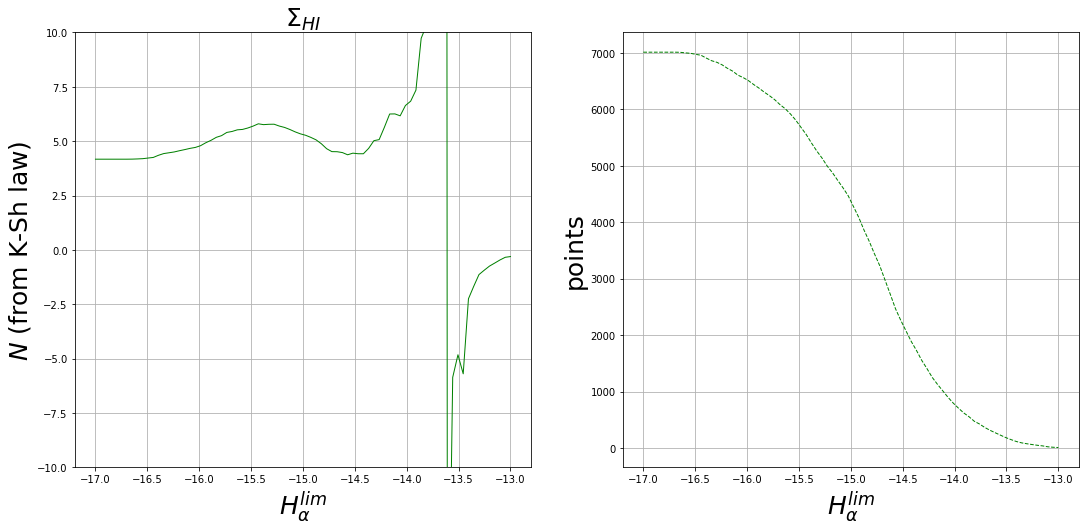

In [81]:
fig = plt.figure(figsize=[18, 8])
plt.subplot(1,2,1)
plt.plot(np.array(np.linspace(-17.,-13.,80)), N_HI, '-', lw=1, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$H_{\alpha}^{lim}$', fontsize = 25)
plt.ylim(-10,10)
plt.title(r'$\Sigma_{HI}$',fontsize = 25)

plt.subplot(1,2,2)
plt.plot(np.array(np.linspace(-17.,-13.,80)),points_HI, '--', lw=1, color='g')
plt.grid()
plt.ylabel('points', fontsize = 25)
plt.xlabel(r'$H_{\alpha}^{lim}$', fontsize = 25)

In [82]:
Sigma_g = 1.36*(Sigma_HI + Sigma_H2) 
N_gas = []
points_gas = []
for hlim in np.array(np.linspace(-17.,-13.,80)):

    x = []
    y = []
    
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            
            if (np.log10(H_alpha[k][l]) >= hlim) & (Sigma_g[k][l] > 0.) :
                
                x.append(np.log10(Sigma_g[k][l]))
                y.append(np.log10(H_alpha[k][l]))
    
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(y,x)
    N_gas.append(1./gradient)
    points_gas.append(len(y))

Text(0.5, 0, '$H_{\\alpha}^{lim}$')

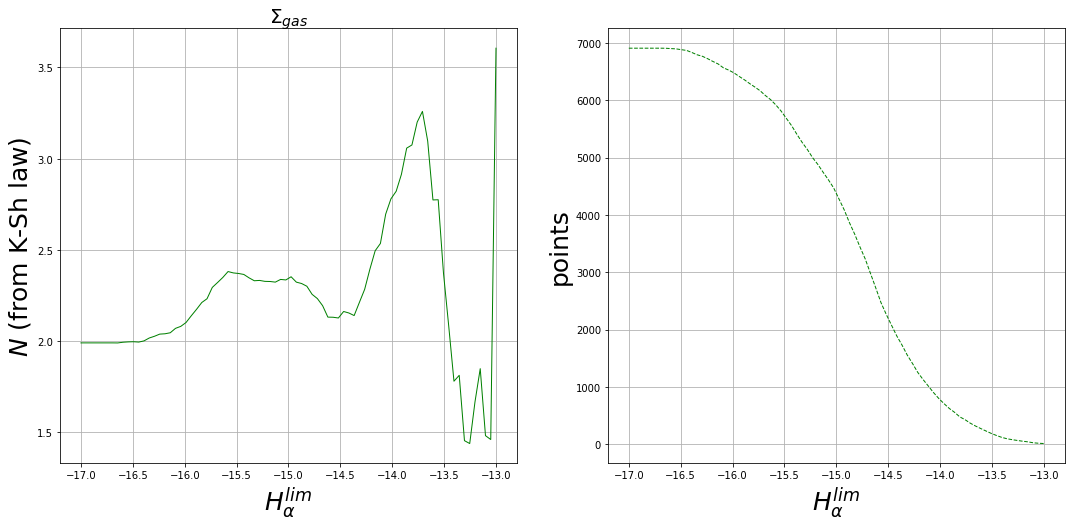

In [83]:
fig = plt.figure(figsize=[18, 8])
plt.subplot(1,2,1)
plt.plot(np.array(np.linspace(-17.,-13.,80)), N_gas, '-', lw=1, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$H_{\alpha}^{lim}$', fontsize = 25)
plt.title(r'$\Sigma_{gas}$',fontsize = 20)

plt.subplot(1,2,2)
plt.plot(np.array(np.linspace(-17.,-13.,80)),points_gas, '--', lw=1, color='g')
plt.grid()
plt.ylabel('points', fontsize = 25)
plt.xlabel(r'$H_{\alpha}^{lim}$', fontsize = 25)